<a href="https://colab.research.google.com/github/eyaguirat10/CoWin-Breast-Cancer-Detection/blob/eya/Eya_Guirat_Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Business Understanding

## **Problem Statement**

Breast cancer is one of the most common and life-threatening diseases affecting women worldwide. According to the World Health Organization, it accounts for a significant proportion of cancer-related deaths among women, with **approximately 2.3 million new cases diagnosed each year**. While the highest incidence is usually observed in women aged **40 to 70**, younger women are increasingly being diagnosed, highlighting the need for vigilance across all age groups. Men can also develop breast cancer, though it is much rarer.

Early detection of breast cancer is crucial because survival rates are significantly higher when the disease is identified at an initial stage. However, **late diagnosis remains common**, particularly in regions with limited access to screening programs, diagnostic facilities, or trained specialists. Factors contributing to delayed detection include:
- Socio-economic barriers  
- Lack of awareness about breast health  
- Cultural stigmas  
- Shortages of radiologists or screening centers  

In some areas, women may delay seeking care due to fear, misinformation, or limited healthcare infrastructure — leading to advanced diagnoses when treatment is more difficult and costly.

Breast cancer can manifest in different forms — **ductal carcinoma, lobular carcinoma, and other subtypes** — each with distinct characteristics and progression rates. The disease may present **asymptomatically** in its early stages, which is why imaging techniques such as **mammography** are critical for screening. Even with mammograms, subtle signs like **microcalcifications** or small lesions can be easily overlooked, even by experienced radiologists.

This issue is particularly pressing in regions where incidence is high and **medical resources are limited**, such as parts of **North Africa**, the **Middle East**, and **some areas of the United States**, where datasets like **CBIS-DDSM** and **MIAS** have been collected. These datasets demonstrate the variability in breast tissue density and lesion appearance, increasing the challenge of accurate detection.

## Stakeholders Affected

- **Doctors / Radiologists**: Responsible for interpreting mammograms and providing medical decisions. Face diagnostic complexity, heavy workloads, and pressure to avoid errors.
- **Hospitals and Clinics**: Handle screening, treatment, and patient management. Diagnostic support tools can improve outcomes and reduce costs.
- **Public Health Organizations**: Lead screening campaigns and healthcare policy. Better tools improve allocation of resources and reduce mortality.
- **Researchers**: Use datasets and AI models to develop new diagnostic tools and improve early detection performance.


Given these challenges, there is a **critical need for computer-assisted systems** that help healthcare professionals detect breast cancer early, accurately, and efficiently.

Such systems can:
- Generate **predictions** and **personalized recommendations** based on mammography or clinical data  
- Improve clinical **decision-making** while minimizing risk to patients  
- Ensure **role-based access** to data: doctors get detailed results, patients receive **validated, understandable recommendations**  

Examples of AI-guided outputs:
- Follow-up imaging requests
- Lifestyle or risk-reduction recommendations
- Alerts for uncertain or borderline diagnosis cases

In summary, breast cancer is a complex issue involving **medical, social, and economic factors**. Our project integrates **artificial intelligence** into the diagnostic workflow to:
- **Enhance early detection**
- **Reduce late diagnoses**
- **Provide safe, actionable guidance for patients**

Ultimately, the project aims to assist all stakeholders and improve breast cancer management outcomes.


---

## **Business Objective (BO)**

1.  ### Determine whether a tumor is malignant or benign based on morphological data extracted from breast tissue imagery, in order to assist clinicians in initial diagnosis.


2.  ### Characterize and differentiate malignant tumor profiles into distinct groups based on their severity or aggressiveness, enabling more targeted follow-up strategies.
   
3.  ### Propose individualized recommendations for new patients by comparing their physiological and biochemical profiles to previously identified cancer risk patterns.  

---

## **Data Science Objectives (DSO)**

1.  ### Develop a classification system that distinguishes between benign and malignant tumors using morphological features from the WDBC dataset and evaluate its accuracy using appropriate performance metrics.


2.  ### Identify natural groupings within malignant tumor cases using unsupervised clustering techniques in order to define clinically relevant cancer subtypes.
   
3.  ### Implement a recommendation system that maps new patient profiles (from the Coimbra dataset) to known cluster patterns and delivers personalized insights based on proximity to known cancer risk profiles.

### DSO1: Predict the diagnosis type — **M (Malignant)** or **B (Benign)**

| Modèles             | Liste des variables | Liste des paramètres |
|---------------------|---------------------|-----------------------|
| GRU SVM             |                     |                       |
| SVM                 |                     |                       |
| Linear Regression   |                     |                       |
| MLP                 |                     |                       |
| Nearest Neighbor    |                     |                       |
| Softmax Regression  |                     |                       |
| XGBOOST (new)       |                     |                       |
| Random Forest (new) |                     |                       |


### DSO2: Cluster diagnosis patterns

| Modèles                | Liste des variables | Liste des paramètres |
|------------------------|---------------------|-----------------------|
| Kmeans                 |                     |                       |
| DBSCAN                 |                     |                       |
| Gaussian Mixture Model |                     |                       |


### DSO3: Cluster-based recommendation system

| Modèles               | Liste des variables | Liste des paramètres |
|------------------------|---------------------|-----------------------|
| KNeighborsClassifier   |                     |                       |
| DecisionTreeClassifier |                     |                       |
| Apriori                |                     |                       |


# II. Data Understanding

##II.1. DSO1 : Predict the diagnosis type — M (Malignant) or B (Benign)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/Datasets/CancerData1.csv"
df = pd.read_csv(path)


In [4]:
print("Dimensions :", df.shape)
print("Colonnes :", df.columns.tolist())
print("\nTypes :", df.dtypes)

Dimensions : (569, 33)
Colonnes : ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

Types : id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              

In [5]:
print(df.head())
print(df.tail())
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Missing values
             Missing Count  Missing Percentage
Unnamed: 32            569               100.0


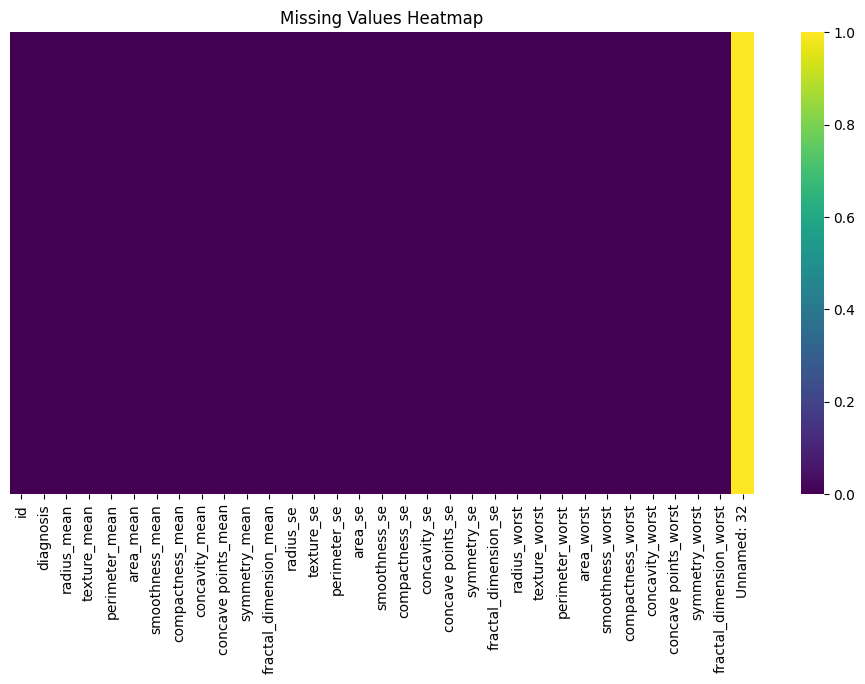

In [7]:
print("Missing values")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])


plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
print("Basic statistics")
print(df.describe())

# For the diagnosis column specifically
print("\n Diagnosis distribution")
print(df['diagnosis'].value_counts())
print(f"Malignant Percentage: {(df['diagnosis'] == 'M').mean()*100:.2f}%")

Basic statistics
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064      

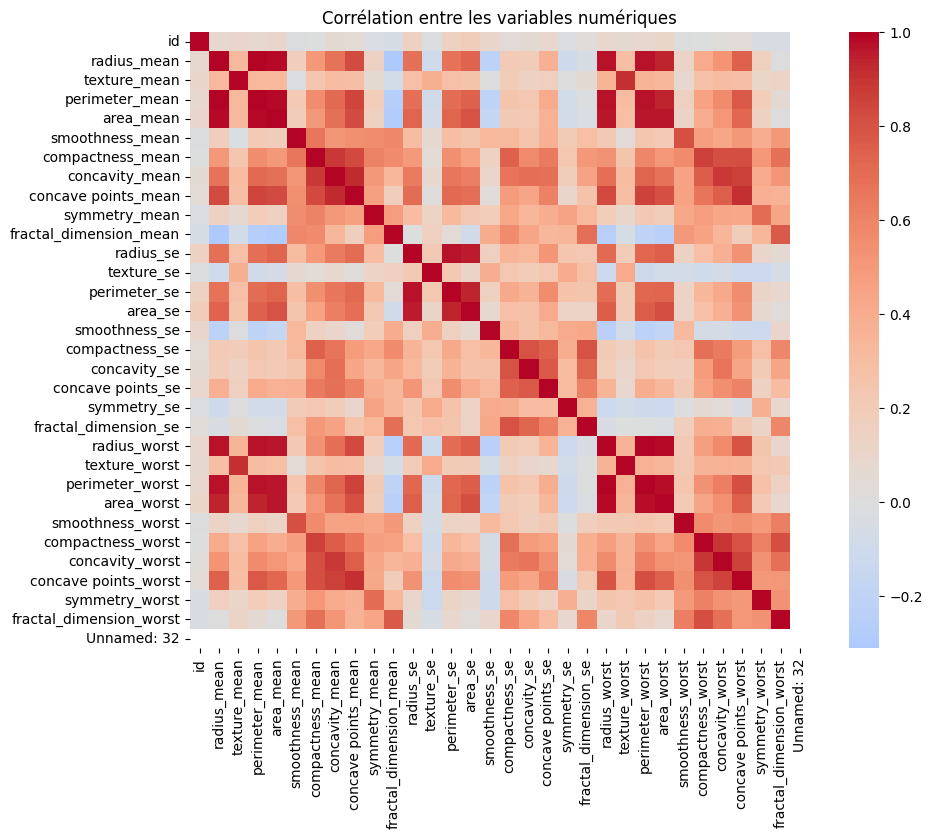

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Corrélation entre les variables numériques")
plt.show()

Outlier detection
Outliers in key features:
id: 81 outliers
radius_mean: 14 outliers
texture_mean: 7 outliers
perimeter_mean: 13 outliers
area_mean: 25 outliers


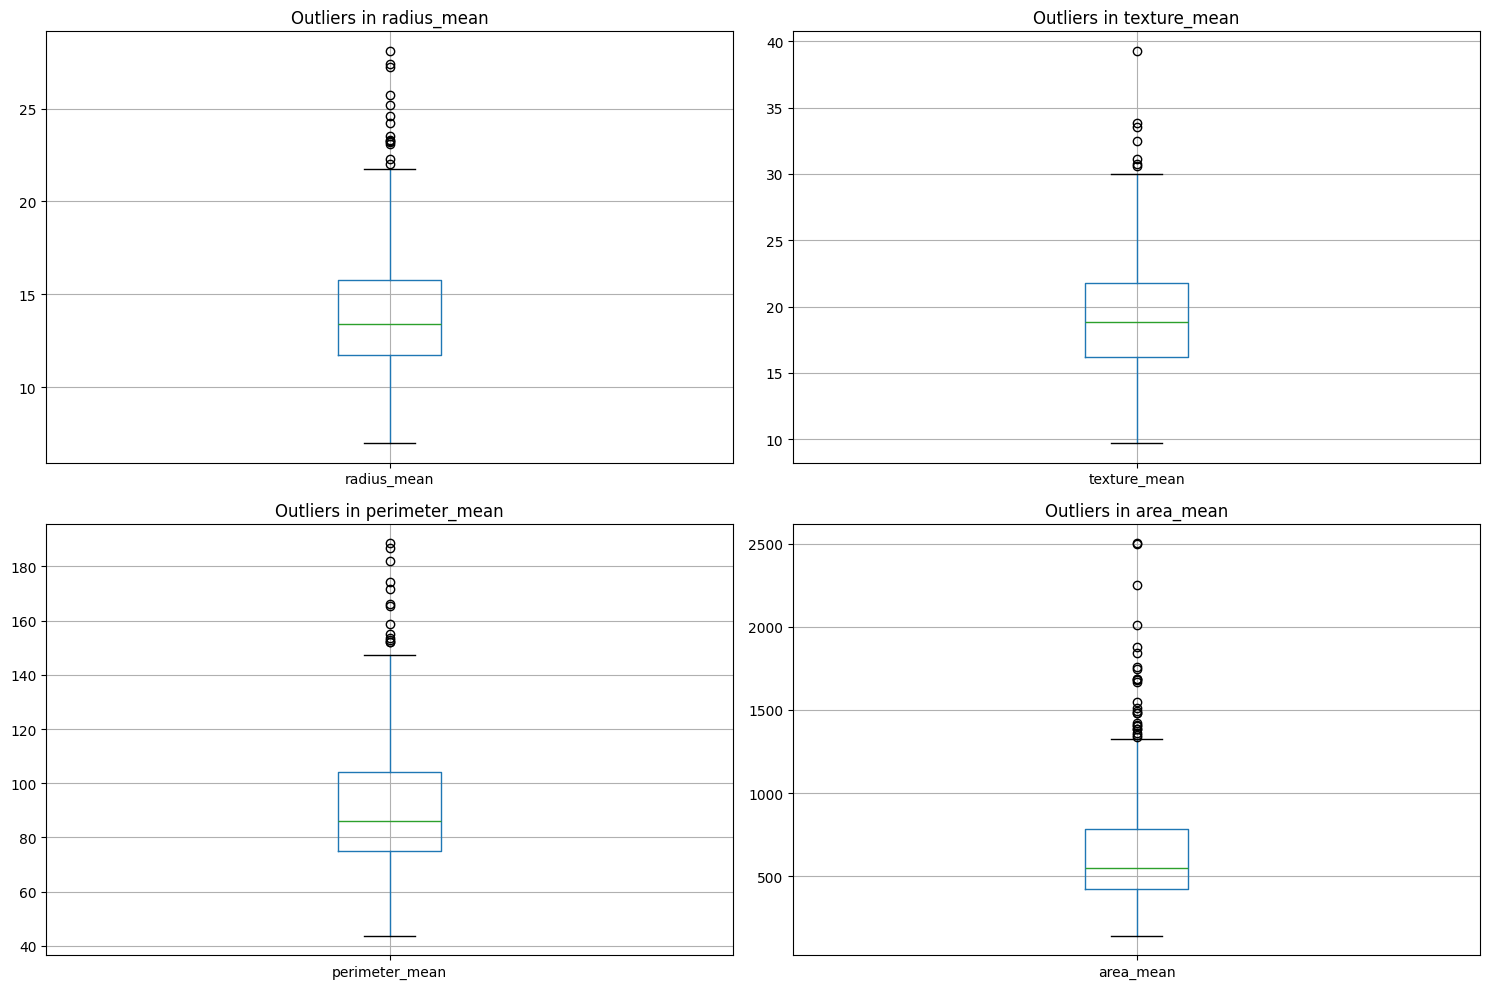

In [10]:
print("Outlier detection")

# Method 1: IQR for numerical columns
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Check outliers in key numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

print("Outliers in key features:")
for col in numerical_cols[:5]:  # Check first 5 numerical columns
    outliers = detect_outliers_iqr(df[col])
    print(f"{col}: {len(outliers)} outliers")

# Visualize outliers for key features
key_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    df.boxplot(column=feature, ax=axes[i])
    axes[i].set_title(f'Outliers in {feature}')

plt.tight_layout()
plt.show()

In [11]:
print("Data quality summary")
print(f"Total records: {len(df)}")
print(f"Total features: {len(df.columns)}")
print(f"Duplicate rows: {df.duplicated().sum()}")

# Check for constant columns (columns with only one value)
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"Constant columns: {constant_cols}")

# Check for columns with too many zeros
print("\n columns with many zeros")
for col in numerical_cols:
    zero_percent = (df[col] == 0).mean() * 100
    if zero_percent > 50:  # Show columns with more than 50% zeros
        print(f"{col}: {zero_percent:.2f}% zeros")

Data quality summary
Total records: 569
Total features: 33
Duplicate rows: 0
Constant columns: []

 columns with many zeros


Target variable analysis


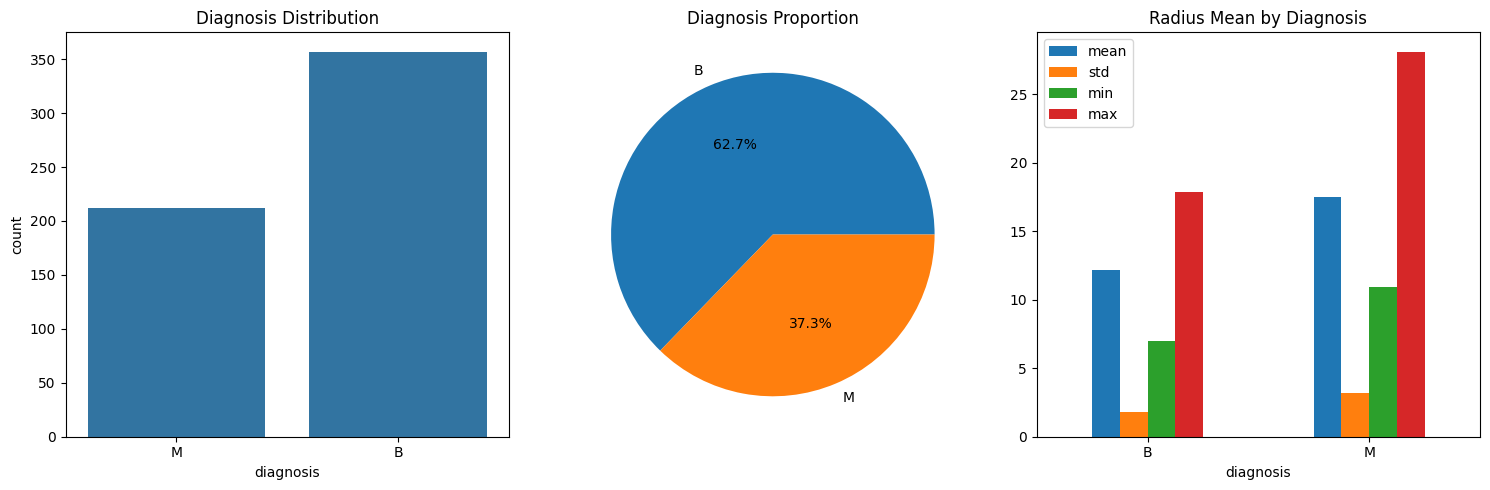

Diagnosis value counts:
diagnosis
B    357
M    212
Name: count, dtype: int64


In [12]:
print("Target variable analysis")
diagnosis_counts = df['diagnosis'].value_counts()

plt.figure(figsize=(15, 5))

# Subplot 1: Count plot
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='diagnosis')
plt.title('Diagnosis Distribution')

# Subplot 2: Pie chart
plt.subplot(1, 3, 2)
plt.pie(diagnosis_counts.values, labels=diagnosis_counts.index, autopct='%1.1f%%')
plt.title('Diagnosis Proportion')

# Subplot 3: Statistics by diagnosis
plt.subplot(1, 3, 3)
diagnosis_stats = df.groupby('diagnosis')['radius_mean'].agg(['mean', 'std', 'min', 'max'])
diagnosis_stats.plot(kind='bar', ax=plt.gca())
plt.title('Radius Mean by Diagnosis')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print(f"Diagnosis value counts:\n{diagnosis_counts}")

Correlation analysis
Top 10 features correlated with diagnosis:
diagnosis_numeric       1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis_numeric, dtype: float64

 Bottom 10 features correlated with diagnosis:
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0.039769
symmetry_se               -0.006522
texture_se                -0.008303
fractal_dimension_mean    -0.012838
smoothness_se             -0.067016
Unnamed: 32                     NaN
Name: diagnosis_numeric, dtype: float64


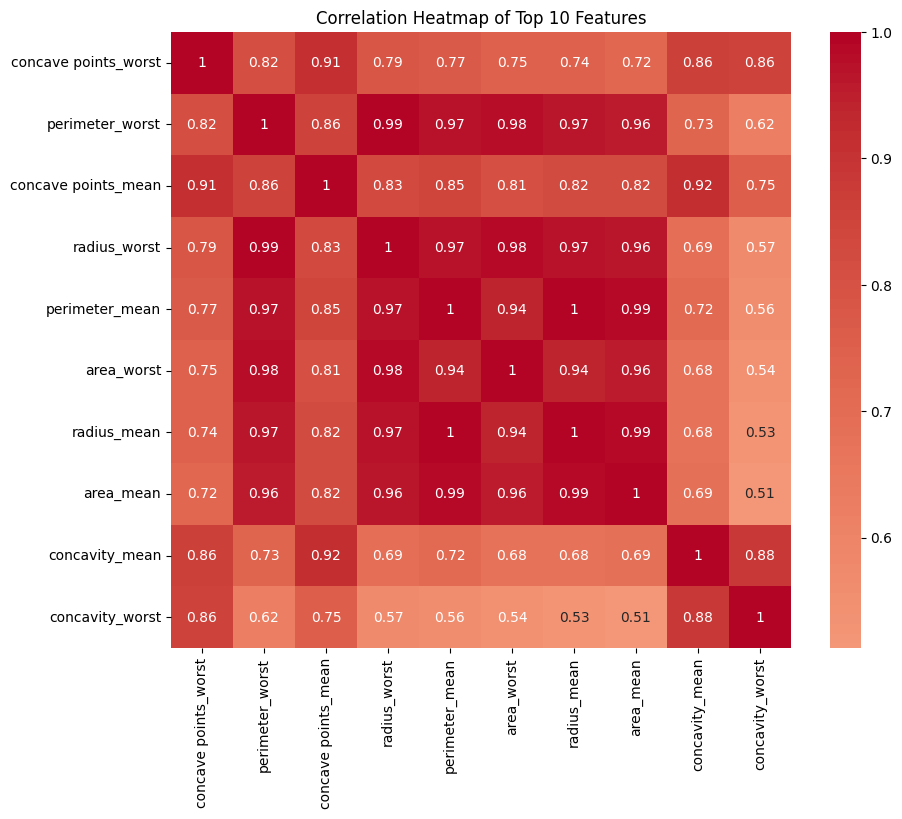

In [13]:
print("Correlation analysis")

# Convert diagnosis to numerical for correlation
df_corr = df.copy()
df_corr['diagnosis_numeric'] = df_corr['diagnosis'].map({'M': 1, 'B': 0})

# Correlation with target
corr_with_target = df_corr.corr(numeric_only=True)['diagnosis_numeric'].sort_values(ascending=False)
print("Top 10 features correlated with diagnosis:")
print(corr_with_target.head(10))

print("\n Bottom 10 features correlated with diagnosis:")
print(corr_with_target.tail(10))

# Plot correlation heatmap for top features
top_corr_features = corr_with_target.index[1:11]  # Exclude diagnosis itself
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr[top_corr_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Top 10 Features')
plt.show()

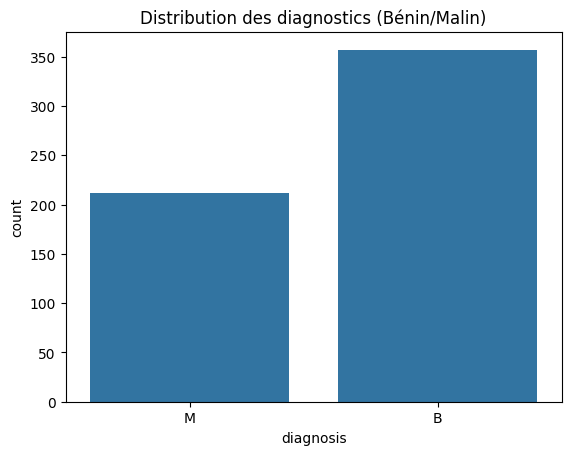

In [14]:
sns.countplot(x="diagnosis", data=df)
plt.title("Distribution des diagnostics (Bénin/Malin)")
plt.show()

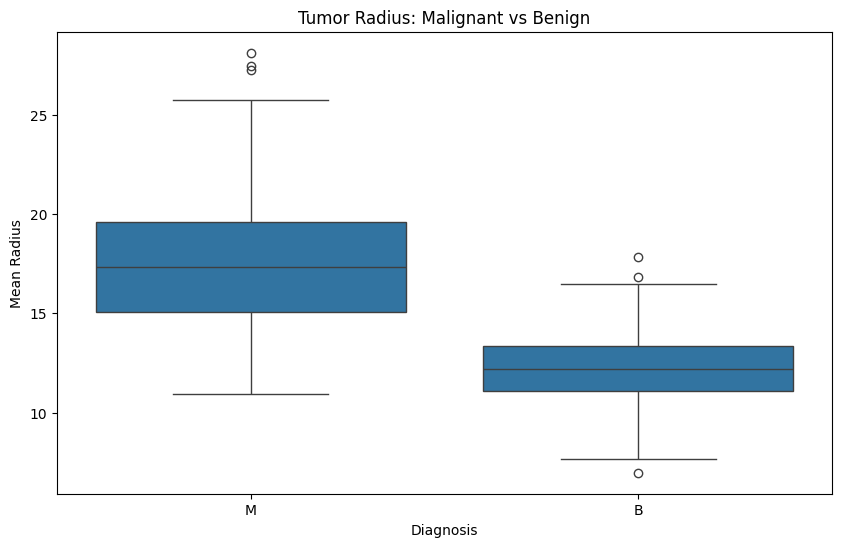

In [15]:
# Compare a key feature between malignant and benign
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diagnosis', y='radius_mean')
plt.title('Tumor Radius: Malignant vs Benign')
plt.ylabel('Mean Radius')
plt.xlabel('Diagnosis')
plt.show()

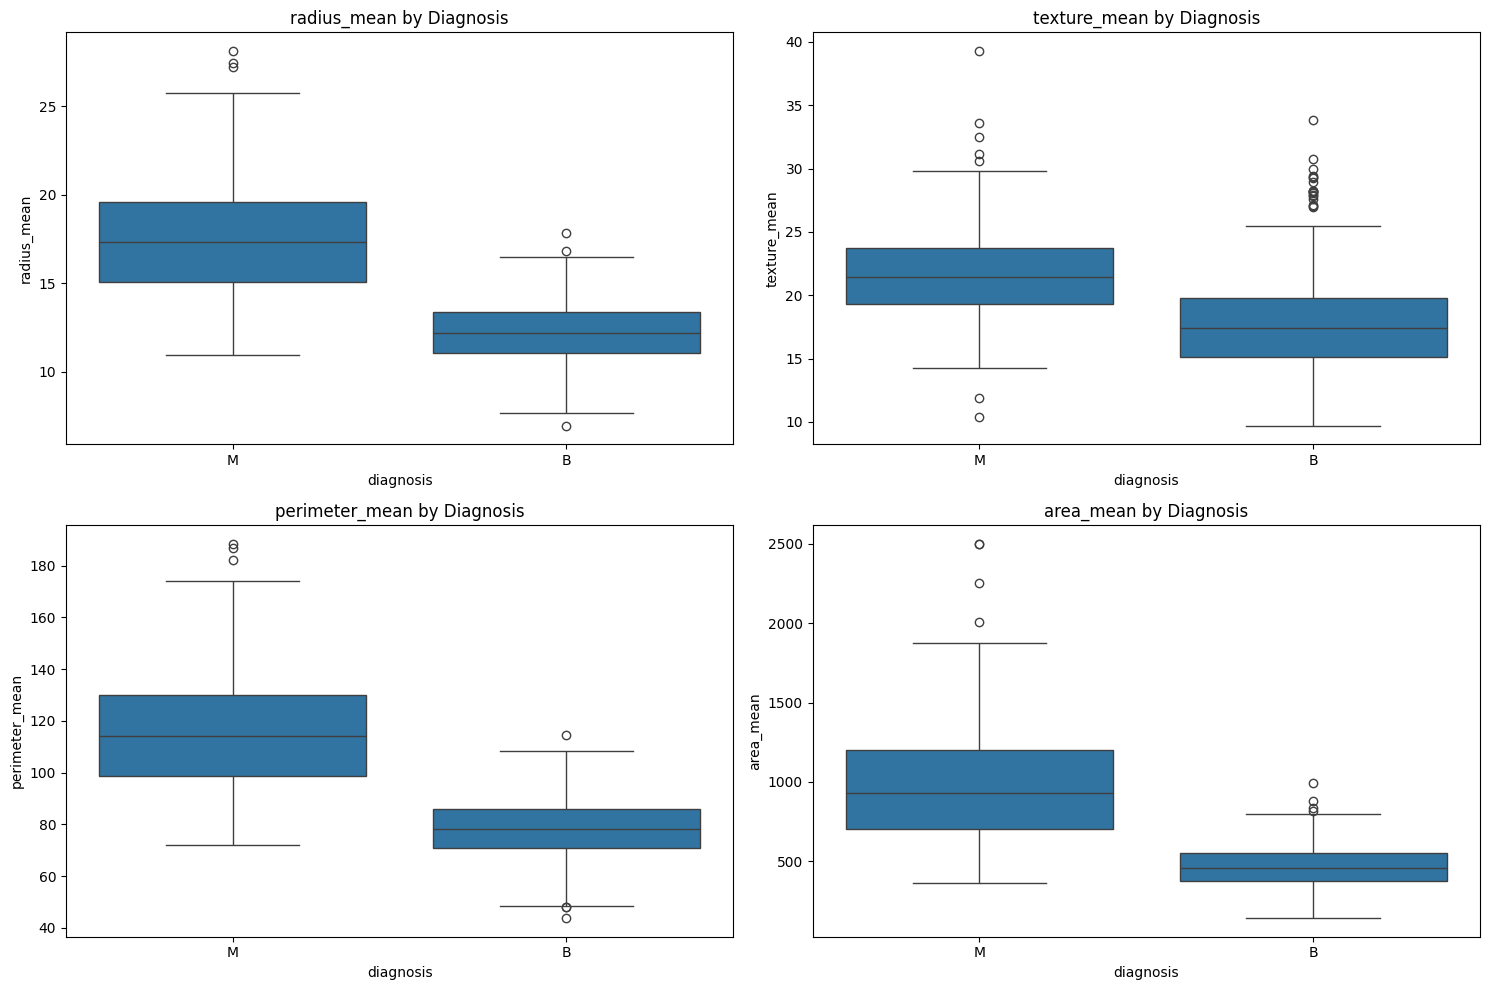

In [16]:
# Selecting few key features to compare
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features_to_plot):
    sns.boxplot(data=df, x='diagnosis', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} by Diagnosis')

plt.tight_layout()
plt.show()

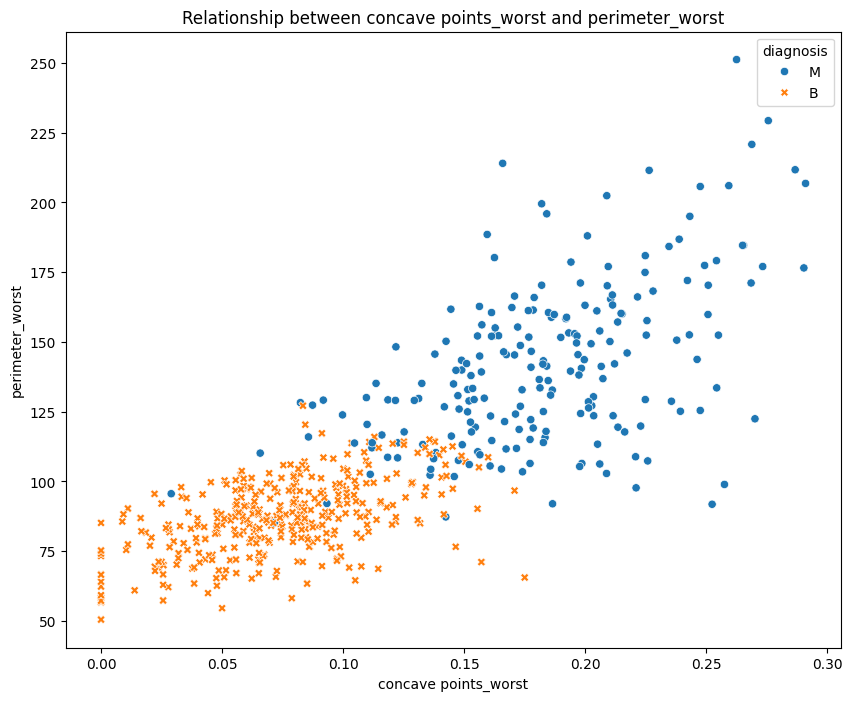

In [17]:
# Find two features most correlated with diagnosis
top_two = corr_with_target.index[1:3]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x=top_two[0], y=top_two[1], hue='diagnosis', style='diagnosis')
plt.title(f'Relationship between {top_two[0]} and {top_two[1]}')
plt.show()

##II.2. Dataset 2: DSO2 + DSO3

In [18]:
path = "/content/drive/MyDrive/Dataset_ML/dataR2.csv"
df2 = pd.read_csv(path)

In [19]:
df2.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [20]:
df2.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [21]:
df2.dtypes

,0
Age,int64
BMI,float64
Glucose,int64
Insulin,float64
HOMA,float64
Leptin,float64
Adiponectin,float64
Resistin,float64
MCP.1,float64
Classification,int64


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [23]:
df2.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


 Missing Values Analysis

In this step, we calculate how many missing (null) values exist in each column of the dataset. This information is important because columns with many missing values may need special handling, such as imputation or removal, to ensure the quality of our analysis and models.

In [24]:
info_df = pd.DataFrame({
        'Column': df2.columns,
        'Non_Null_Count': df2.count(),
        'Null_Count': df2.isnull().sum(),
        'Missing_%': (df2.isnull().sum() / len(df2) * 100).round(2)
    })
print(info_df.to_string(index=False))


        Column  Non_Null_Count  Null_Count  Missing_%
           Age             116           0        0.0
           BMI             116           0        0.0
       Glucose             116           0        0.0
       Insulin             116           0        0.0
          HOMA             116           0        0.0
        Leptin             116           0        0.0
   Adiponectin             116           0        0.0
      Resistin             116           0        0.0
         MCP.1             116           0        0.0
Classification             116           0        0.0


Duplicate Analysis

In this step, we check the dataset for duplicate rows. Duplicate records can skew analysis and models by overrepresenting certain data points.

In [25]:
duplicate_count = df2.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percentage: {(duplicate_count/len(df2)*100):.2f}%")
print()


Number of duplicate rows: 0



Data Visualization

Boxplots are used to visualize the distribution of numerical data and detect outliers. They display the median, quartiles, and potential extreme values for each feature, helping us understand variability and spot anomalies that may need further investigation or treatment.

Create boxplots for numerical columns

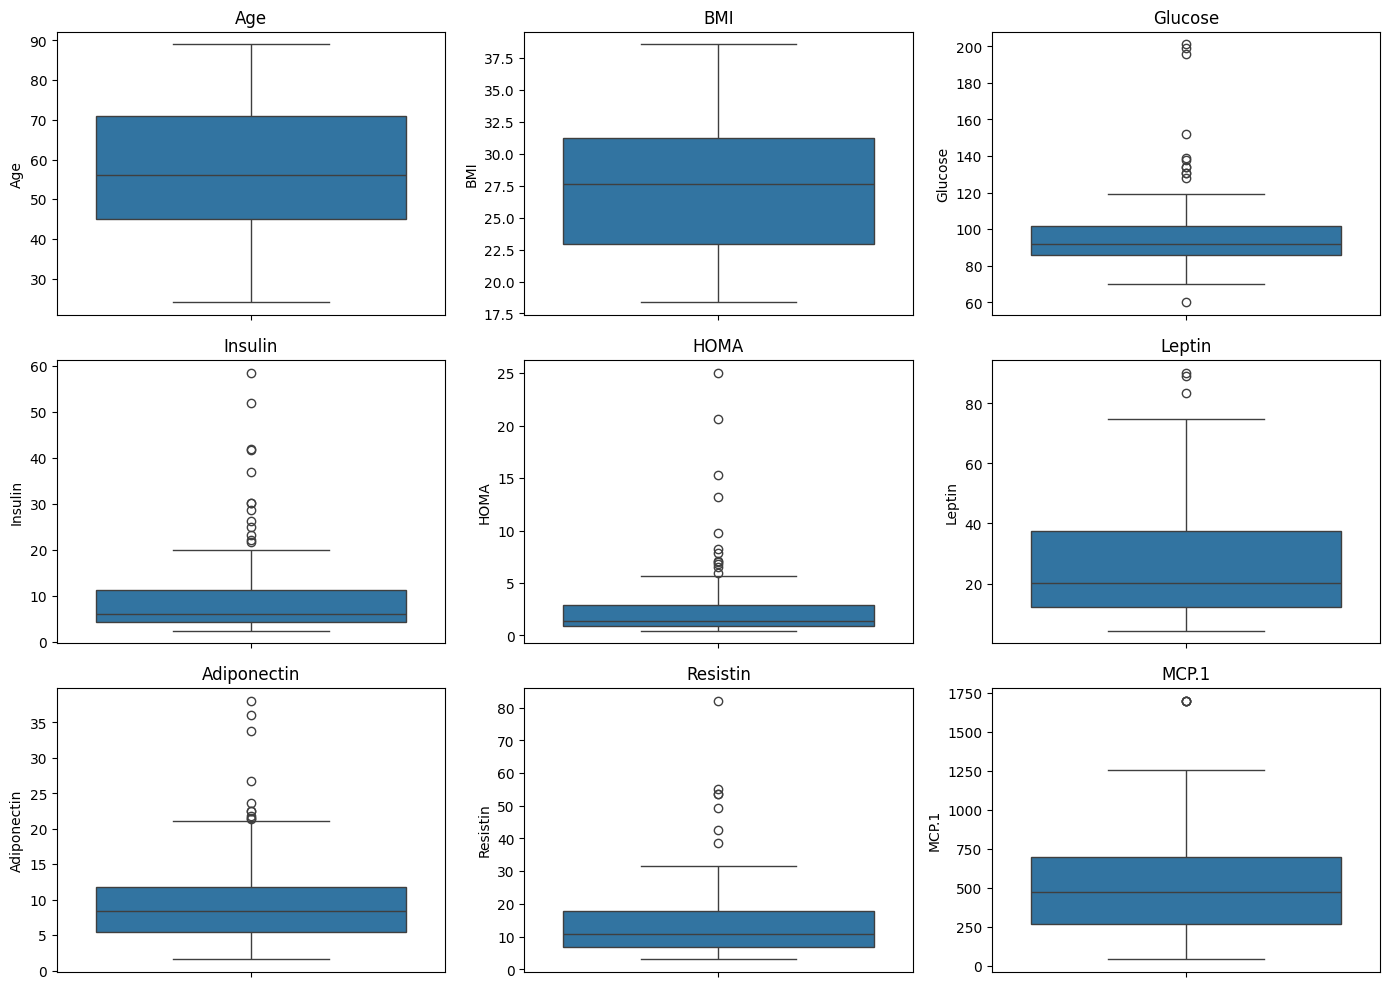

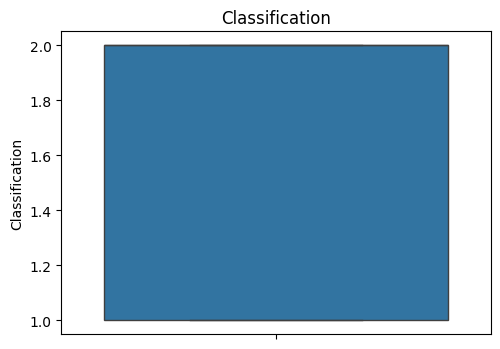

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns

numerical_cols = [col for col in numerical_cols if df2[col].dropna().shape[0] > 0]
cols_per_fig = 9  # number of boxplots per figure

for start in range(0, len(numerical_cols), cols_per_fig):
    end = start + cols_per_fig
    batch = numerical_cols[start:end]

    plt.figure(figsize=(14, 10))
    for i, col in enumerate(batch, 1):
        plt.subplot(3, 3, i)  # 2 rows, 3 columns
        sns.boxplot(y=df2[col])
        plt.title(col)

    plt.tight_layout()
    plt.show()


This dataset was constructed for research purposes → outliers are not errors, they are anomalies related to the disease.

Correlation Visualization:

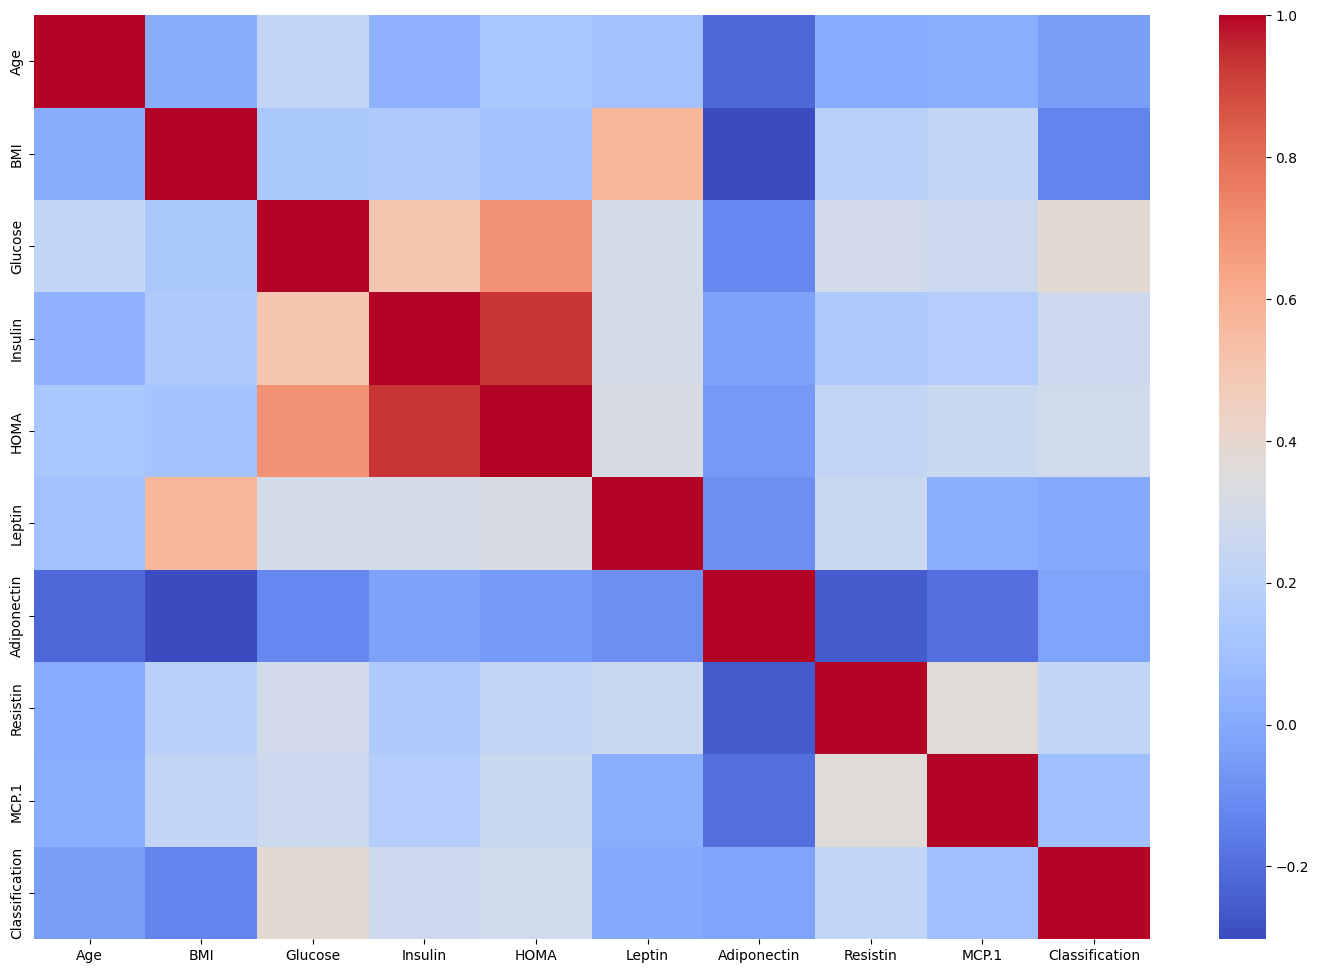

In [27]:
# correlation matrix between variables
df_features = df2.drop(columns=['Classification'])
plt.figure(figsize=(18, 12))
sns.heatmap(df2.corr(), annot=False, cmap='coolwarm')
plt.show()

In [28]:
# correlation matrix of variables with the target
# creation of numerical diagnosis

df2.corr()['Classification'].sort_values(ascending=False)

,Classification
Classification,1.000000
Glucose,0.384315
HOMA,0.284012
Insulin,0.276804
Resistin,0.227310
MCP.1,0.091381
Leptin,-0.001078
Adiponectin,-0.019490
Age,-0.043555
BMI,-0.132586


Principal Component Analysis (PCA)

In [29]:
# standardisation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Select only numeric variables
X = df2.select_dtypes(include=[np.number])

# --- 2. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Explained variance
print("Variance expliquée par PC1 et PC2 :", pca.explained_variance_ratio_)


Variance expliquée par PC1 et PC2 : [0.3169621  0.16237842]


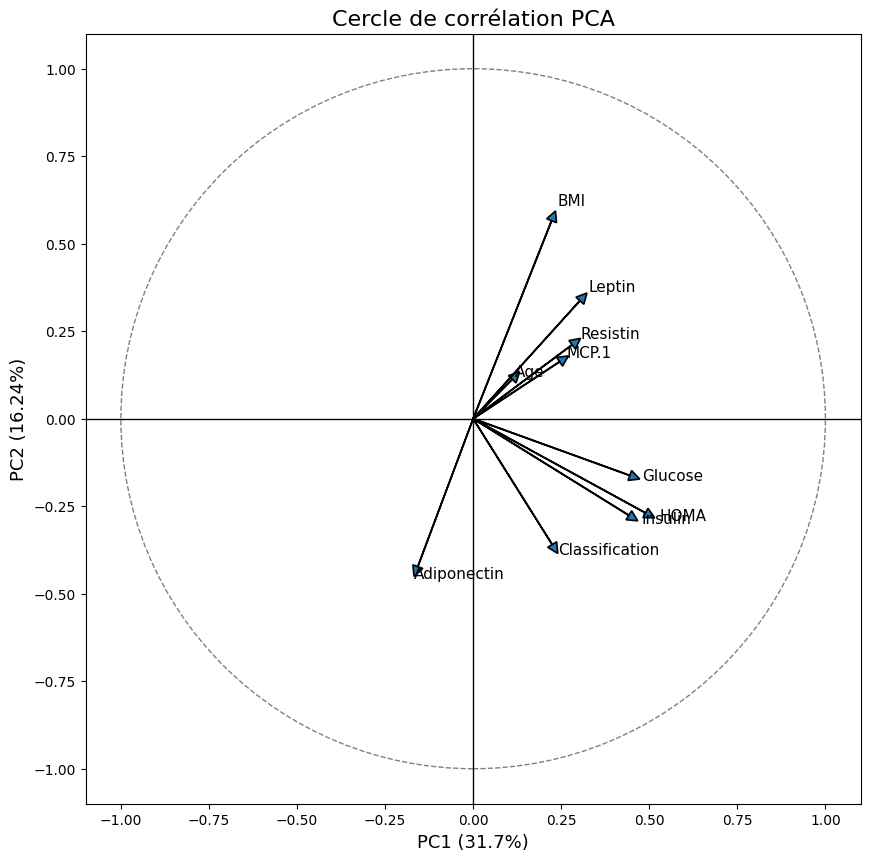

In [30]:
# --- correlation circle ---
def plot_correlation_circle(pca, features, dim1=1, dim2=2):
    pcs = pca.components_
    pc1 = pcs[dim1-1]
    pc2 = pcs[dim2-1]

    fig, ax = plt.subplots(figsize=(10,10))

    # Circle
    circle = plt.Circle((0,0), 1, color='grey', fill=False, linestyle='--')
    ax.add_artist(circle)

    # Axes
    ax.axhline(0, color='black', lw=1)
    ax.axvline(0, color='black', lw=1)

    # Variables
    for i, feature in enumerate(features):
        x = pc1[i]
        y = pc2[i]
        ax.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, linewidth=1.2)
        ax.text(x*1.08, y*1.08, feature, fontsize=11)

    ax.set_xlabel(f"PC{dim1} ({round(pca.explained_variance_ratio_[dim1-1]*100,2)}%)", fontsize=13)
    ax.set_ylabel(f"PC{dim2} ({round(pca.explained_variance_ratio_[dim2-1]*100,2)}%)", fontsize=13)
    ax.set_title("Cercle de corrélation PCA", fontsize=16)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    plt.grid(False)
    plt.show()

# --- Function call ---
plot_correlation_circle(pca, X.columns)


#III. Data Preparation

##III.1. DSO1 : Predict the diagnosis type — M (Malignant) or B (Benign)

In [31]:
df.drop(columns=['Unnamed: 32', 'id'], inplace=True, errors='ignore')
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [32]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [33]:
scaler = StandardScaler()
X = df.drop('diagnosis', axis=1)
y = df["diagnosis"]
X_scaled = scaler.fit_transform(X)
scores = X_scaled

In [34]:
pca = PCA()
pca.fit(X_scaled)

PCA()

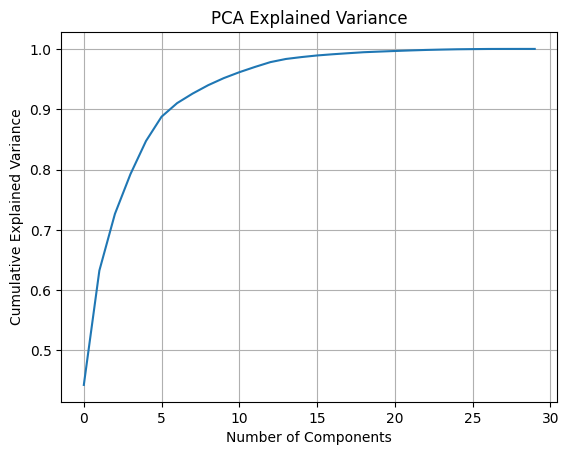

In [35]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()

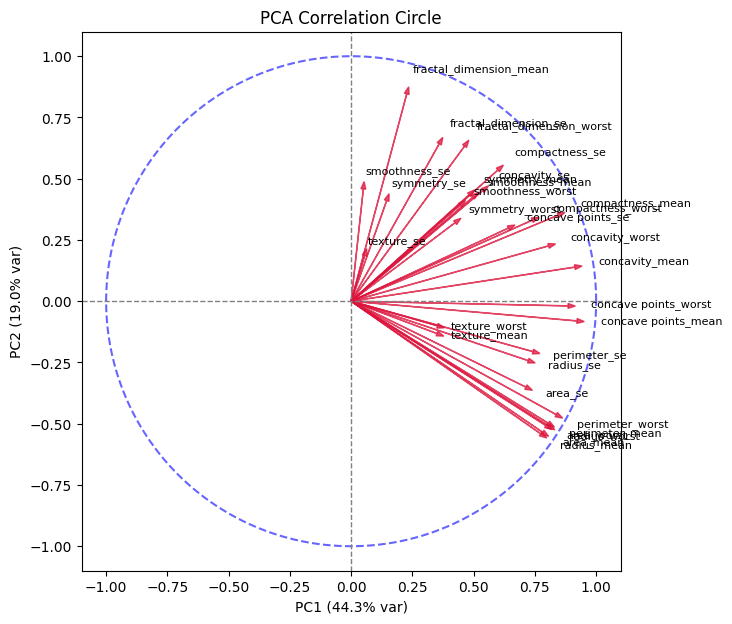

In [36]:
eigvals = pca.explained_variance_
loadings_corr = pca.components_.T * np.sqrt(eigvals)  # shape (n_features, 2)

fig, ax = plt.subplots(figsize=(7, 7))
theta = np.linspace(0, 2*np.pi, 500)
ax.plot(np.cos(theta), np.sin(theta), 'b--', alpha=0.6)

names = X.columns
for i, name in enumerate(names):
    x, y_ = loadings_corr[i, 0], loadings_corr[i, 1]
    ax.arrow(0, 0, x, y_, color='crimson', alpha=0.75,
             head_width=0.02, length_includes_head=True)
    ax.text(x*1.07, y_*1.07, name, fontsize=8)

ax.axhline(0, color='grey', lw=1, ls='--')
ax.axvline(0, color='grey', lw=1, ls='--')
ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
ax.set_title("PCA Correlation Circle")
ax.set_aspect('equal', 'box')
plt.show()

In [37]:
pcs = [f"PC{i}" for i in range(1, scores.shape[1] + 1)]
scores_df = pd.DataFrame(scores @ pca.components_.T, columns=pcs)
scores_df["diagnosis"] = df["diagnosis"]

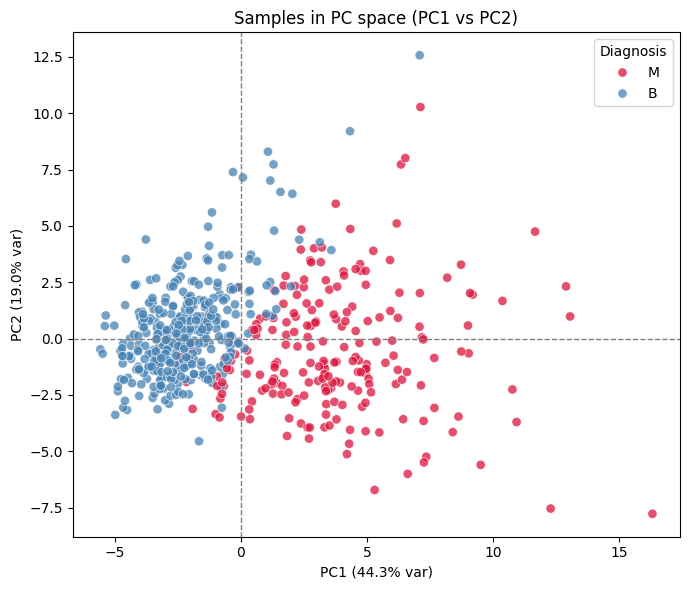

In [38]:
plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=scores_df, x="PC1", y="PC2",
    hue="diagnosis",
    palette={"M": "crimson", "B": "steelblue"},
    alpha=0.75, edgecolor="white", s=45
)
plt.axhline(0, color="grey", ls="--", lw=1)
plt.axvline(0, color="grey", ls="--", lw=1)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("Samples in PC space (PC1 vs PC2)")
plt.legend(title="Diagnosis")
plt.tight_layout()
plt.show()

##### 1. Data preparation for the model

- I start from the cleaned dataframe `df` (after removing `id` and `Unnamed: 32`).
- I create:
  - `X_model` = copy of all 30 feature columns  
  - `y_model` = copy of the `diagnosis` column
- I encode the target so that:
  - `B` → 0 (Benign)  
  - `M` → 1 (Malignant)
- The input features used by the model are the **standardised features** `X_scaled` (output of `StandardScaler`), so each variable has mean 0 and variance 1.
- I split the data into **70% training / 30% test** using `train_test_split` with `stratify=y_model` to keep the same proportion of benign and malignant cases in both sets.  
  This reproduces the protocol used in the research paper.

In [39]:
# Defensive copies (good practice)
X_model = X.copy()
y_model = y.copy()

In [40]:
# Encode target: Malignant = 1, Benign = 0
y_model = y_model.map({'M': 1, 'B': 0})

In [41]:
# 70% train / 30% test, stratified by the target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_model, test_size=0.3, random_state=42, stratify=y_model
)

In this part, we build and evaluate a **Random Forest classifier** to predict whether a tumour is **benign (0)** or **malignant (1)** using the 30 numerical features of the dataset (data.csv)

##III.2. Dataset 2: DSO2 + DSO3

DSO2

In [42]:
features = [col for col in df2.columns if col != "Classification"]
X2 = df2[features].values
y2 = df2["Classification"].values


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X2)

DSO3

*We are going to prepare the Coimbra Dataset for the reccomendation system*

In [44]:
df_complete = df2.copy()

In [45]:
df_complete["cluster_final"] = np.nan

#IV. Modeling

##IV.1. DSO1 : Predict the diagnosis type — M (Malignant) or B (Benign)

### Random Forest Model

#####Training the Random Forest

- I create a `RandomForestClassifier` with:
  - `n_estimators = 100` trees,
  - `class_weight = 'balanced'` to compensate the slight class imbalance,
  - `random_state = 42` for reproducibility.
- I fit the model **only on the training set** (`X_train`, `y_train`).

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# Fit on training data only
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

#####Visualisation of one tree

- The Random Forest is an ensemble of 100 trees, which is hard to visualise directly.
- For interpretability, I plot **one tree** from the forest (`rf.estimators_[5]`) with a maximum depth of 3.
- This shows how the model uses the most important features (for example `area_worst`, `concave points_mean`, etc.) to split between benign and malignant tumours.

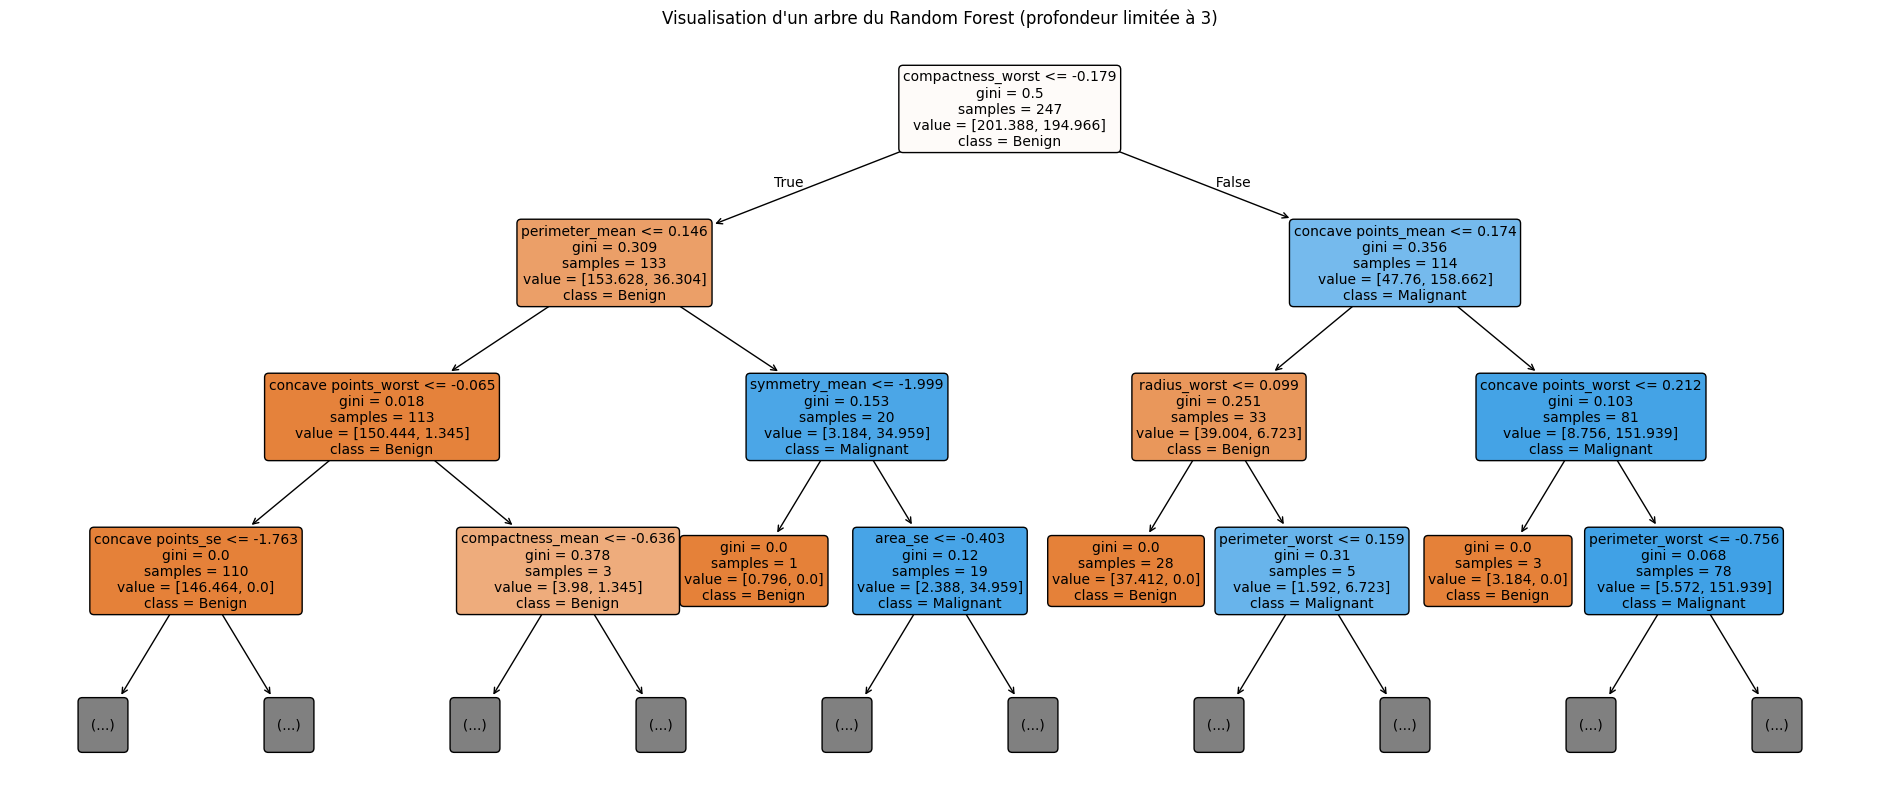

In [47]:
from sklearn.tree import plot_tree
features = X.columns
estimator = rf.estimators_[5]
plt.figure(figsize=(24, 10))
plot_tree(
    estimator,
    feature_names=features,
    class_names=["Benign", "Malignant"],
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=10
)
plt.title("Visualisation d'un arbre du Random Forest (profondeur limitée à 3)")
plt.show()

### MLP

In this part, we build and tune a **Multi-Layer Perceptron (MLP) classifier** to predict whether a tumour is **benign (0)** or **malignant (1)** using the same 30 numerical features as for the Random Forest.


#### Data preparation for the MLP

- Start from the cleaned dataframe `df`.
- Create:
  - `X_model_2` = copy of the 30 feature columns  
  - `y_model_2` = copy of the `diagnosis` column
- Encode the target:
  - `B` → 0 (Benign)
  - `M` → 1 (Malignant)
- Use the standardised features `X_scaled` as input to the MLP.
- Split into **70% train / 30% test**, stratified by the target, to keep the same class proportions.

In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [49]:
X_model_2 = X.copy()
y_model_2 = y.copy()
y_model_2 = y_model_2.map({'M': 1, 'B': 0})

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_model_2,
    test_size=0.3,
    random_state=42,
    stratify=y_model_2
)

- I use `predict_proba` to get the predicted probability of the malignant class on the test set.

The ROC curve of the Random Forest on the test set is very close to the top-left
corner. The Area Under the Curve is **AUC = 0.997**, which indicates an excellent
ability to separate benign (0) from malignant (1) tumours.  
The model keeps a very high true positive rate (sensitivity) while maintaining a
very low false positive rate, which is desirable in a medical screening context.

####Base MLP architecture

- Define a base `MLPClassifier` with:
  - activation `relu`
  - optimiser `adam`
  - batch size 32
  - `max_iter = 500`
  - `early_stopping = True` with `validation_fraction = 0.2` and `n_iter_no_change = 20`  
    → adds an anti-overfitting safety: training stops when validation score stagnates.
- The exact hidden layer sizes and regularisation will be chosen by grid search.

In [51]:
mlp_base = MLPClassifier(
    activation='relu',
    solver='adam',
    batch_size=32,
    max_iter=500,
    early_stopping=True,      # on garde une sécurité anti-overfitting
    validation_fraction=0.2,
    n_iter_no_change=20,
    random_state=42
)

### GRU-SVM

We implement a **GRU-SVM model**: a GRU network that outputs a single linear score,
trained with **hinge loss** (SVM style) instead of cross-entropy.

####Data preparation

- The starting point is still `X_scaled` (30 standardised features) and `y`.
- For the SVM formulation we encode the labels as:
  - `M` → +1
  - `B` → −1
- GRUs expect a 3D input `(samples, timesteps, features)`.  
  Here we treat the 30 features as a “sequence” of length 30 with 1 feature per step:
  `X_gru.shape = (n_samples, 30, 1)`.
- We perform a **70% / 30%** train–test split, stratified on `y_gru`.

In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [53]:
y_gru = y.map({'M': 1, 'B': -1}).astype('float32')

In [54]:
n_samples, n_features = X_scaled.shape
X_gru = X_scaled.reshape(n_samples, n_features, 1)

In [55]:
X_train_gru, X_test_gru, y_train_gru, y_test_gru = train_test_split(
    X_gru,
    y_gru,
    test_size=0.3,
    random_state=42,
    stratify=y_gru
)

####GRU-SVM architecture

- Custom metric `svm_accuracy`:
  - takes the **sign** of the model output,
  - compares it to the true labels in {−1, +1}.
- Model structure:
  - one `GRU(32)` layer (sequence → 32-dim embedding),
  - one `Dropout(0.3)` layer to reduce overfitting,
  - one `Dense(1, activation='linear')` output → raw SVM score.
- We compile with:
  - optimiser: `Adam(learning_rate=1e-3)`
  - loss: `'hinge'` (SVM margin loss)
  - metric: `svm_accuracy`.

In [56]:
def svm_accuracy(y_true, y_pred):
    # signe de la prédiction
    y_pred_sign = tf.sign(y_pred)
    # si le modèle sort exactement 0, on force à +1
    y_pred_sign = tf.where(tf.equal(y_pred_sign, 0.0),
                           tf.ones_like(y_pred_sign),
                           y_pred_sign)
    equal = tf.equal(y_true, y_pred_sign)
    return tf.reduce_mean(tf.cast(equal, tf.float32))

gru_svm = Sequential([
    GRU(32, input_shape=(n_features, 1), return_sequences=False),
    Dropout(0.3),
    Dense(1, activation='linear')    # sortie linéaire pour hinge
])

gru_svm.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='hinge',
    metrics=[svm_accuracy]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


####Training the GRU-SVM

- Use `EarlyStopping` on `val_loss` with:
  - `patience = 30`
  - `restore_best_weights = True`
- Training configuration:
  - validation split: 20% of the training set,
  - `epochs = 300` (training may stop earlier thanks to early stopping),
  - `batch_size = 32`,
  - `verbose = 0` for a clean notebook.
- At the end, we print the epoch where training actually stopped.

In [57]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
)

history_gru = gru_svm.fit(
    X_train_gru, y_train_gru,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)

print(f"Training stopped at epoch {len(history_gru.history['loss'])}")

Training stopped at epoch 93


##IV.1. DSO2: Cluster diagnosis patterns

In [58]:
#1) Keep only the sick
df_cancer = df2[df2["Classification"] == 2].copy() #df containing only patients
df_non_cancer = df2[df2["Classification"] == 1].copy() #df containing only non-patients
print(df_cancer.shape)  # number of sick patients

(64, 10)


### **Modéle 1 (K-means)**

In [59]:
# 2) Features = all explanatory columns WITHOUT Classification
features = [col for col in df_cancer.columns if col != "Classification"]
X_cancer = df_cancer[features].values

In [60]:
from sklearn.preprocessing import StandardScaler

scaler_cancer = StandardScaler()
X_cancer_scaled = scaler_cancer.fit_transform(X_cancer)


K=2: silhouette=0.231
K=3: silhouette=0.219
K=4: silhouette=0.209


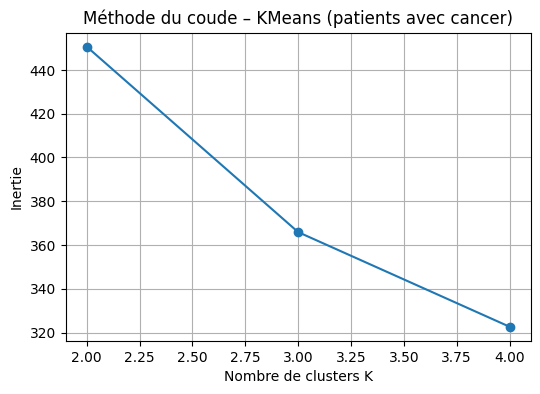

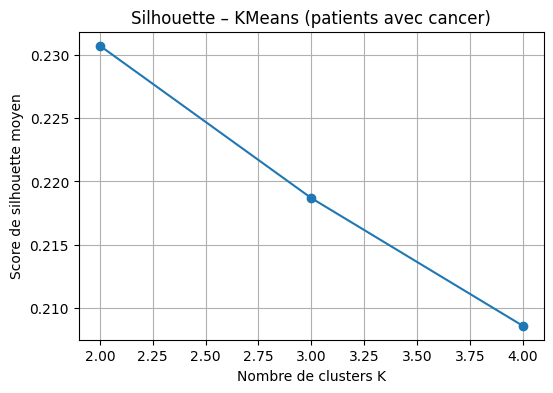

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
sil_scores = []
K_range = range(2, 5)  # K = 2, 3, 4 for cancer subtypes

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_cancer_scaled)
    inertias.append(km.inertia_)
    labels = km.labels_
    sil = silhouette_score(X_cancer_scaled, labels)
    sil_scores.append(sil)
    print(f"K={k}: silhouette={sil:.3f}")

# Elobow
plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Nombre de clusters K")
plt.ylabel("Inertie")
plt.title("Méthode du coude – KMeans (patients avec cancer)")
plt.grid(True)
plt.show()

# Silhouette
plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Nombre de clusters K")
plt.ylabel("Score de silhouette moyen")
plt.title("Silhouette – KMeans (patients avec cancer)")
plt.grid(True)
plt.show()


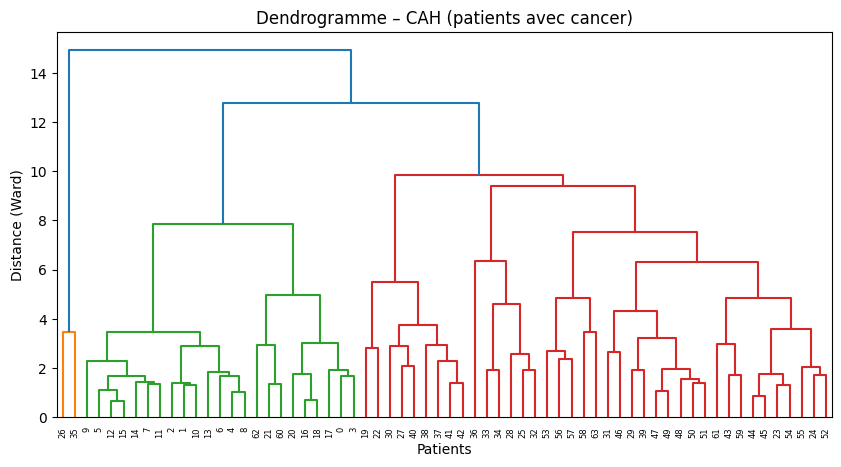

In [62]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical link with Ward's criterion (suitable for standardized continuous data)
Z = linkage(X_cancer_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode=None, color_threshold=None)
plt.title("Dendrogramme – CAH (patients avec cancer)")
plt.xlabel("Patients")
plt.ylabel("Distance (Ward)")
plt.show()


For k=2

In [63]:
best_k = 2

kmeans_cancer = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_cancer.fit(X_cancer_scaled)

cluster_labels_cancer = kmeans_cancer.labels_

# Add cluster labels in df_cancer
df_cancer["cluster_kmeans_cancer"] = cluster_labels_cancer

# If you want to reintegrate into the complete df (NaN for non-patients)
df2["cluster_kmeans_cancer"] = np.nan
df2.loc[df_cancer.index, "cluster_kmeans_cancer"] = cluster_labels_cancer


In [64]:
# Average of variables per cluster
cluster_profile = df_cancer.groupby("cluster_kmeans_cancer")[features].mean()
print(cluster_profile)

# Number of patients per cluster
print(df_cancer["cluster_kmeans_cancer"].value_counts())


                             Age        BMI  Glucose    Insulin      HOMA  \
cluster_kmeans_cancer                                                       
0                      52.975000  24.661490   94.875   7.094225  1.668641   
1                      62.833333  30.856824  123.375  21.544875  6.881176   

                          Leptin  Adiponectin   Resistin      MCP.1  
cluster_kmeans_cancer                                                
0                      16.935700    10.423703  16.408309  494.80115  
1                      42.697867     9.456941  18.662891  676.70875  
cluster_kmeans_cancer
0    40
1    24
Name: count, dtype: int64


In [65]:
from sklearn.decomposition import PCA

# 2D PCA projection for patients with cancer
pca_vis = PCA(n_components=2)
X_cancer_pca = pca_vis.fit_transform(X_cancer_scaled)

# IMPORTANT: add columns to df_cancer
df_cancer = df_cancer.copy()
df_cancer["PC1"] = X_cancer_pca[:, 0]
df_cancer["PC2"] = X_cancer_pca[:, 1]


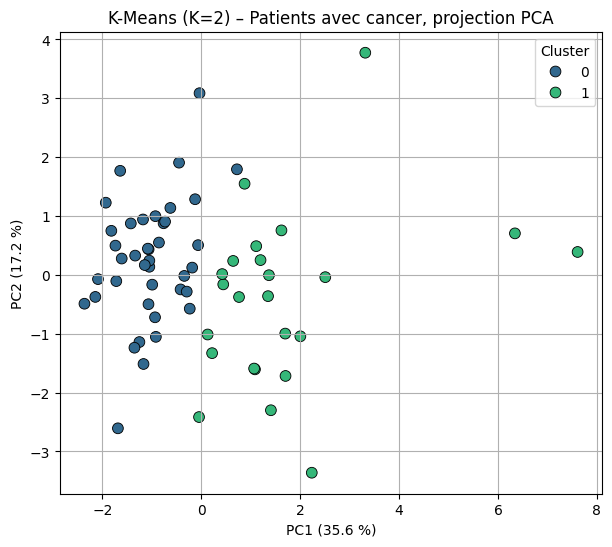

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df_cancer,
    x="PC1", y="PC2",
    hue="cluster_kmeans_cancer",
    palette="viridis",
    s=60,
    edgecolor="k"
)
plt.xlabel(f"PC1 ({pca_vis.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca_vis.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("K-Means (K=2) – Patients avec cancer, projection PCA")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


Cluster 0:

Younger age, lower BMI, significantly lower glucose, insulin, and HOMA than cluster 1 → less disturbed metabolic profile.

Leptin, resistin, and MCP.1 also lower, consistent with more moderate obesity/inflammation.

A consistent name: " Cancers with moderate metabolic risk“ or ”Moderate metabolic subtype."

Cluster 1:

Higher average age (63 years vs. ~53), significantly higher BMI (31), very high glucose (~123), insulin and HOMA multiplied by 3–4 → high insulin resistance/metabolic syndrome. Leptin and MCP.1 much higher, resistin also higher → profile of marked obesity and greater systemic inflammation.

A consistent name: “High metabolic risk cancers (obesity and insulin resistance)” or, more briefly, “Severe metabolic subtype.”

For k=3

In [67]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# We start with df_cancer, features, and X_cancer_scaled already defined.
best_k = 3

kmeans_cancer_3 = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_cancer_3.fit(X_cancer_scaled)

cluster_labels_cancer_3 = kmeans_cancer_3.labels_
df_cancer["cluster_kmeans_cancer_3"] = cluster_labels_cancer_3

# Internal quality
sil_3 = silhouette_score(X_cancer_scaled, cluster_labels_cancer_3)
print("Silhouette K=3 (cancers) :", sil_3)


Silhouette K=3 (cancers) : 0.21868320395349716


In [68]:
df_cancer.head(50)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster_kmeans_cancer,PC1,PC2,cluster_kmeans_cancer_3
52,45,21.303949,102,13.852,3.485163,7.6476,21.056625,23.03408,552.444,2,0,-1.050763,0.137829,0
53,45,20.829995,74,4.560,0.832352,7.7529,8.237405,28.03230,382.955,2,0,-1.931268,1.226793,0
54,49,20.956608,94,12.305,2.853119,11.2406,8.412175,23.11770,573.630,2,0,-0.927665,0.997197,0
55,34,24.242424,92,21.699,4.924226,16.7353,21.823745,12.06534,481.949,2,0,-0.935356,-0.720615,0
56,42,21.359915,93,2.999,0.687971,19.0826,8.462915,17.37615,321.919,2,0,-1.735671,0.496970,0
57,68,21.082813,102,6.200,1.559920,9.6994,8.574655,13.74244,448.799,2,0,-1.050433,0.241925,0
58,51,19.132653,93,4.364,1.001102,11.0816,5.807620,5.57055,90.600,2,0,-2.088691,-0.071911,0
59,62,22.656250,92,3.482,0.790182,9.8648,11.236235,10.69548,703.973,2,0,-1.337004,0.327515,0
60,38,22.499637,95,5.261,1.232828,8.4380,4.771920,15.73606,199.055,2,0,-1.819040,0.748879,0
61,69,21.513859,112,6.683,1.846290,32.5800,4.138025,15.69876,713.239,2,0,-0.064542,0.505418,0


In [69]:
df_cancer.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster_kmeans_cancer,PC1,PC2,cluster_kmeans_cancer_3
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2,0,-0.918649,-1.053066,0
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2,0,-1.351784,-1.237602,0
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2,1,-0.045444,-2.415937,1
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2,0,-1.685919,-2.607044,0
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2,1,2.234369,-3.361737,1


In [70]:
# Number of patients per cluster
print(df_cancer["cluster_kmeans_cancer_3"].value_counts())

# Average of variables per cluster
cluster_profile_3 = df_cancer.groupby("cluster_kmeans_cancer_3")[features].mean()
print(cluster_profile_3)


cluster_kmeans_cancer_3
0    39
1    22
2     3
Name: count, dtype: int64
                               Age        BMI     Glucose    Insulin  \
cluster_kmeans_cancer_3                                                
0                        53.076923  24.530303   95.512821   7.060846   
1                        60.818182  31.124368  110.681818  19.085727   
2                        73.000000  28.535148  198.666667  35.195667   

                              HOMA     Leptin  Adiponectin   Resistin  \
cluster_kmeans_cancer_3                                                 
0                         1.674255  16.053572    10.415805  16.296522   
1                         5.224861  42.701214    10.015245  15.248236   
2                        17.216999  45.553600     5.787642  44.405400   

                               MCP.1  
cluster_kmeans_cancer_3               
0                         492.040000  
1                         562.193500  
2                        1491.746333  


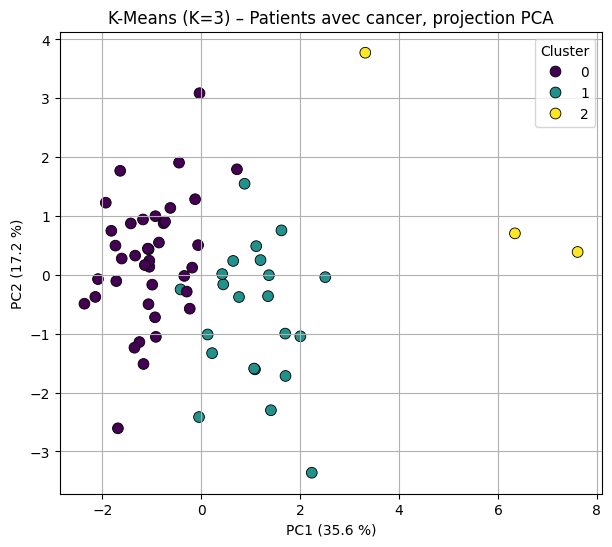

In [71]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca_vis_3 = PCA(n_components=2)
X_cancer_pca_3 = pca_vis_3.fit_transform(X_cancer_scaled)

df_cancer["PC1_3"] = X_cancer_pca_3[:, 0]
df_cancer["PC2_3"] = X_cancer_pca_3[:, 1]

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df_cancer,
    x="PC1_3", y="PC2_3",
    hue="cluster_kmeans_cancer_3",
    palette="viridis",
    s=60,
    edgecolor="k"
)
plt.xlabel(f"PC1 ({pca_vis_3.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca_vis_3.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("K-Means (K=3) – Patients avec cancer, projection PCA")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


Looking at the figure:

Cluster 0 (purple) is mainly on the left, with lower PC1 values → cancers with a relatively less disturbed metabolic profile, closer to “normal” in terms of glucose/insulin/HOMA.

Cluster 1 (green) occupies the central/right area, with higher PC1 than cluster 0 → cancers with intermediate metabolic abnormalities (higher glucose/HOMA), but not as extreme as cluster 2.

Cluster 2 (yellow) includes a few patients on the far right in PC1 → the most extreme cases on the metabolic axis (very high hyperglycemia and/or insulin resistance, probably also high BMI/leptin).

Cluster 0: “Moderate metabolic cancers”

Least disturbed metabolic profile among patients.

Cluster 1: “Intermediate metabolic risk cancers”

Clear but not extreme metabolic abnormalities, central group.

Cluster 2: “Severe metabolic cancers (extreme profiles)”

A few patients with very marked disorders, located at the extreme end of PC1.

### **Modéle 2 (Agglomerative)**

In [72]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# CAH model with k = 3
agg_cancer_3 = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward"       # euclidean + Ward
)

labels_agg_3 = agg_cancer_3.fit_predict(X_cancer_scaled)

# Add labels to df_cancer
df_cancer["cluster_agg_3"] = labels_agg_3

# (optional) put back into the complete df
df2["cluster_agg_3"] = np.nan
df2.loc[df_cancer.index, "cluster_agg_3"] = labels_agg_3

# Silhouette to evaluate quality (optional but useful for comparison with KMeans)
sil_agg_3 = silhouette_score(X_cancer_scaled, labels_agg_3)
print("Silhouette CAH k= :", sil_agg_3)


Silhouette CAH k= : 0.16333552353660807


In [73]:
df_cancer.head(50)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster_kmeans_cancer,PC1,PC2,cluster_kmeans_cancer_3,PC1_3,PC2_3,cluster_agg_3
52,45,21.303949,102,13.852,3.485163,7.6476,21.056625,23.03408,552.444,2,0,-1.050763,0.137829,0,-1.050763,0.137829,2
53,45,20.829995,74,4.560,0.832352,7.7529,8.237405,28.03230,382.955,2,0,-1.931268,1.226793,0,-1.931268,1.226793,2
54,49,20.956608,94,12.305,2.853119,11.2406,8.412175,23.11770,573.630,2,0,-0.927665,0.997197,0,-0.927665,0.997197,2
55,34,24.242424,92,21.699,4.924226,16.7353,21.823745,12.06534,481.949,2,0,-0.935356,-0.720615,0,-0.935356,-0.720615,2
56,42,21.359915,93,2.999,0.687971,19.0826,8.462915,17.37615,321.919,2,0,-1.735671,0.496970,0,-1.735671,0.496970,2
57,68,21.082813,102,6.200,1.559920,9.6994,8.574655,13.74244,448.799,2,0,-1.050433,0.241925,0,-1.050433,0.241925,2
58,51,19.132653,93,4.364,1.001102,11.0816,5.807620,5.57055,90.600,2,0,-2.088691,-0.071911,0,-2.088691,-0.071911,2
59,62,22.656250,92,3.482,0.790182,9.8648,11.236235,10.69548,703.973,2,0,-1.337004,0.327515,0,-1.337004,0.327515,2
60,38,22.499637,95,5.261,1.232828,8.4380,4.771920,15.73606,199.055,2,0,-1.819040,0.748879,0,-1.819040,0.748879,2
61,69,21.513859,112,6.683,1.846290,32.5800,4.138025,15.69876,713.239,2,0,-0.064542,0.505418,0,-0.064542,0.505418,2


In [74]:
cluster_profile_agg_3 = df_cancer.groupby("cluster_agg_3")[features].mean()
print(cluster_profile_agg_3)

print(df_cancer["cluster_agg_3"].value_counts())


                     Age        BMI     Glucose    Insulin       HOMA  \
cluster_agg_3                                                           
0              57.410256  29.880644  106.282051  14.330564   3.850754   
1              85.500000  27.177722  198.500000  46.712500  22.840538   
2              52.913043  22.057513   96.260870   6.457783   1.566669   

                 Leptin  Adiponectin   Resistin        MCP.1  
cluster_agg_3                                                 
0              32.79450     9.141144  19.044226   606.100231  
1              59.26470     6.629410  39.792700  1388.399500  
2              13.24617    11.919620  12.257892   418.189043  
cluster_agg_3
0    39
2    23
1     2
Name: count, dtype: int64


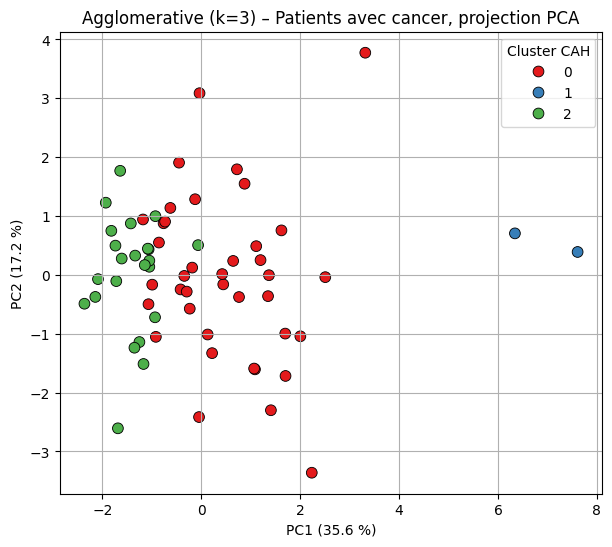

In [75]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# We start with X_cancer_scaled (cancer patients, standardized)
pca_agg = PCA(n_components=2)
X_cancer_pca_agg = pca_agg.fit_transform(X_cancer_scaled)

# Add the components to df_cancer
df_cancer["PC1_agg"] = X_cancer_pca_agg[:, 0]
df_cancer["PC2_agg"] = X_cancer_pca_agg[:, 1]

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df_cancer,
    x="PC1_agg", y="PC2_agg",
    hue="cluster_agg_3",        # labels CAH (0 et 1)
    palette="Set1",
    s=60,
    edgecolor="k"
)
plt.xlabel(f"PC1 ({pca_agg.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca_agg.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("Agglomerative (k=3) – Patients avec cancer, projection PCA")
plt.legend(title="Cluster CAH")
plt.grid(True)
plt.show()


### **Modèle 3 (GMM)**


GMM k=2: silhouette=0.258
GMM k=3: silhouette=0.168
GMM k=4: silhouette=0.152


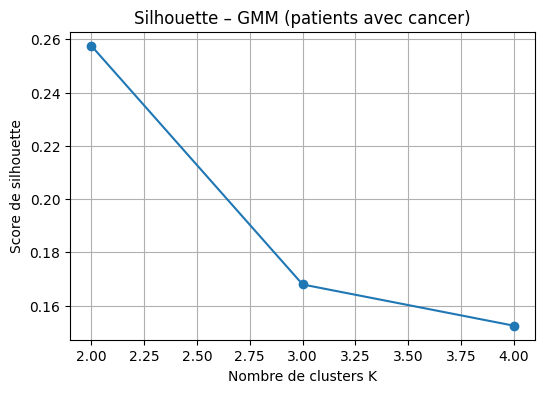

In [76]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Test k = 2, 3, 4
K_range = range(2, 5)
sil_scores_gmm = []

for k in K_range:
    gmm = GaussianMixture(
        n_components=k,
        covariance_type="full",
        random_state=42
    )
    gmm.fit(X_cancer_scaled)

    labels = gmm.predict(X_cancer_scaled)
    sil = silhouette_score(X_cancer_scaled, labels)
    sil_scores_gmm.append(sil)

    print(f"GMM k={k}: silhouette={sil:.3f}")

# Silhouette chart
plt.figure(figsize=(6, 4))
plt.plot(K_range, sil_scores_gmm, marker='o')
plt.xlabel("Nombre de clusters K")
plt.ylabel("Score de silhouette")
plt.title("Silhouette – GMM (patients avec cancer)")
plt.grid(True)
plt.show()


In [77]:
import numpy as np

# Choose the best k
best_k_gmm = 3   # (or the best according to silhouette)

gmm_final = GaussianMixture(
    n_components=best_k_gmm,
    covariance_type="full",
    random_state=42
)
gmm_final.fit(X_cancer_scaled)

# Labels clusters
labels_gmm = gmm_final.predict(X_cancer_scaled)

# Add to df_cancer
df_cancer["cluster_gmm"] = labels_gmm

# Integrate into complete df
df2["cluster_gmm"] = np.nan
df2.loc[df_cancer.index, "cluster_gmm"] = labels_gmm

# Clustering quality
sil_gmm = silhouette_score(X_cancer_scaled, labels_gmm)
print("Silhouette GMM :", sil_gmm)

# Number of patients per cluster
print(df_cancer["cluster_gmm"].value_counts())

# Average cluster profile
cluster_profile_gmm = df_cancer.groupby("cluster_gmm")[features].mean()
print(cluster_profile_gmm)


Silhouette GMM : 0.16794200374270676
cluster_gmm
0    38
1    16
2    10
Name: count, dtype: int64
                   Age        BMI     Glucose    Insulin      HOMA     Leptin  \
cluster_gmm                                                                     
0            55.236842  26.287609   94.736842   7.391053  1.739184  21.215153   
1            63.625000  31.181117  136.812500  22.157187  7.840632  46.906756   
2            51.000000  22.919637   96.700000  16.547100  4.035479  14.549290   

             Adiponectin   Resistin       MCP.1  
cluster_gmm                                      
0               7.739978  18.645044  585.524711  
1               9.527198  19.263164  659.854625  
2              19.736037   8.751942  322.544300  


In [78]:
df_cancer.head(50)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster_kmeans_cancer,PC1,PC2,cluster_kmeans_cancer_3,PC1_3,PC2_3,cluster_agg_3,PC1_agg,PC2_agg,cluster_gmm
52,45,21.303949,102,13.852,3.485163,7.6476,21.056625,23.03408,552.444,2,0,-1.050763,0.137829,0,-1.050763,0.137829,2,-1.050763,0.137829,2
53,45,20.829995,74,4.560,0.832352,7.7529,8.237405,28.03230,382.955,2,0,-1.931268,1.226793,0,-1.931268,1.226793,2,-1.931268,1.226793,0
54,49,20.956608,94,12.305,2.853119,11.2406,8.412175,23.11770,573.630,2,0,-0.927665,0.997197,0,-0.927665,0.997197,2,-0.927665,0.997197,0
55,34,24.242424,92,21.699,4.924226,16.7353,21.823745,12.06534,481.949,2,0,-0.935356,-0.720615,0,-0.935356,-0.720615,2,-0.935356,-0.720615,2
56,42,21.359915,93,2.999,0.687971,19.0826,8.462915,17.37615,321.919,2,0,-1.735671,0.496970,0,-1.735671,0.496970,2,-1.735671,0.496970,0
57,68,21.082813,102,6.200,1.559920,9.6994,8.574655,13.74244,448.799,2,0,-1.050433,0.241925,0,-1.050433,0.241925,2,-1.050433,0.241925,0
58,51,19.132653,93,4.364,1.001102,11.0816,5.807620,5.57055,90.600,2,0,-2.088691,-0.071911,0,-2.088691,-0.071911,2,-2.088691,-0.071911,0
59,62,22.656250,92,3.482,0.790182,9.8648,11.236235,10.69548,703.973,2,0,-1.337004,0.327515,0,-1.337004,0.327515,2,-1.337004,0.327515,0
60,38,22.499637,95,5.261,1.232828,8.4380,4.771920,15.73606,199.055,2,0,-1.819040,0.748879,0,-1.819040,0.748879,2,-1.819040,0.748879,0
61,69,21.513859,112,6.683,1.846290,32.5800,4.138025,15.69876,713.239,2,0,-0.064542,0.505418,0,-0.064542,0.505418,2,-0.064542,0.505418,0


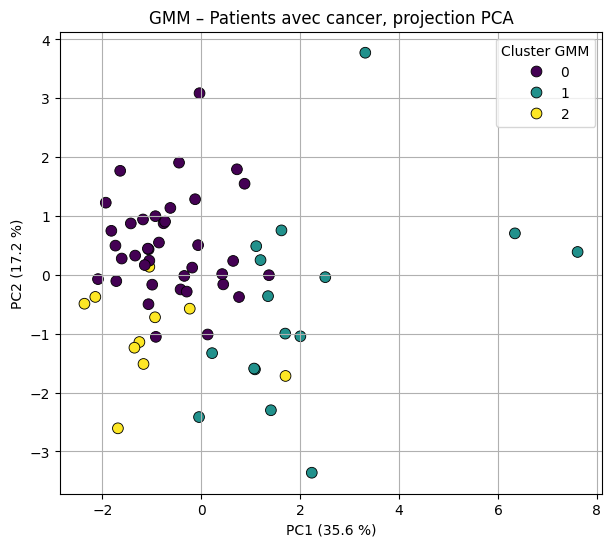

In [79]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# PCA 2D
pca_gmm = PCA(n_components=2)
X_cancer_pca_gmm = pca_gmm.fit_transform(X_cancer_scaled)

df_cancer["PC1_gmm"] = X_cancer_pca_gmm[:, 0]
df_cancer["PC2_gmm"] = X_cancer_pca_gmm[:, 1]

# Scatterplot
plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df_cancer,
    x="PC1_gmm",
    y="PC2_gmm",
    hue="cluster_gmm",
    palette="viridis",
    s=60,
    edgecolor="k"
)
plt.xlabel(f"PC1 ({pca_gmm.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca_gmm.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("GMM – Patients avec cancer, projection PCA")
plt.legend(title="Cluster GMM")
plt.grid(True)
plt.show()


In [80]:
cols_to_drop = ["PC1", "PC2", "PC1_3", "PC2_3", "PC1_agg", "PC2_agg", "PC1_gmm","PC2_gmm"]
df_cancer = df_cancer.drop(columns=cols_to_drop, errors="ignore")


In [81]:
df_cancer.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster_kmeans_cancer,cluster_kmeans_cancer_3,cluster_agg_3,cluster_gmm
52,45,21.303949,102,13.852,3.485163,7.6476,21.056625,23.03408,552.444,2,0,0,2,2
53,45,20.829995,74,4.560,0.832352,7.7529,8.237405,28.03230,382.955,2,0,0,2,0
54,49,20.956608,94,12.305,2.853119,11.2406,8.412175,23.11770,573.630,2,0,0,2,0
55,34,24.242424,92,21.699,4.924226,16.7353,21.823745,12.06534,481.949,2,0,0,2,2
56,42,21.359915,93,2.999,0.687971,19.0826,8.462915,17.37615,321.919,2,0,0,2,0


In [82]:
#assign the cluster to the non-patient
df_non_cancer["cluster_kmeans_cancer"] = 3
df_non_cancer["cluster_kmeans_cancer_3"] = 3
df_non_cancer["cluster_agg_3"] = 3
df_non_cancer["cluster_gmm"] = 3

In [83]:
df_non_cancer.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster_kmeans_cancer,cluster_kmeans_cancer_3,cluster_agg_3,cluster_gmm
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,3,3,3,3
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,3,3,3,3
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,3,3,3,3
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,3,3,3,3
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,3,3,3,3


In [84]:
#merge the dfs
df_complet = pd.concat([df_cancer, df_non_cancer], axis=0)
df_complet = df_complet.sort_index()


In [85]:
print(df_complet["cluster_kmeans_cancer"].value_counts())
print(df_complet["cluster_kmeans_cancer_3"].value_counts())
print(df_complet["cluster_agg_3"].value_counts())
print(df_complet["cluster_gmm"].value_counts())


cluster_kmeans_cancer
3    52
0    40
1    24
Name: count, dtype: int64
cluster_kmeans_cancer_3
3    52
0    39
1    22
2     3
Name: count, dtype: int64
cluster_agg_3
3    52
0    39
2    23
1     2
Name: count, dtype: int64
cluster_gmm
3    52
0    38
1    16
2    10
Name: count, dtype: int64


##IV.3. DSO3

*We are going to prepare the Coimbra Dataset for the reccomendation system*

verifying the types of the clusters

In [86]:
df_cancer.dtypes

,0
Age,int64
BMI,float64
Glucose,int64
Insulin,float64
HOMA,float64
Leptin,float64
Adiponectin,float64
Resistin,float64
MCP.1,float64
Classification,int64


In [87]:
df_complete.columns


Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification', 'cluster_final'],
      dtype='object')

In [110]:
# 2) Fill cancer patients with their KMeans cluster (0,1,2)
df_complete.loc[df_cancer.index, "cluster_final"] = df_cancer["cluster_kmeans_cancer_3"]

# 3) Fill non-cancer patients with 3 (healthy group)
df_complete.loc[df_non_cancer.index, "cluster_final"] = 3

# 4) cast to integer type if there is no NaN left
df_complete["cluster_final"] = df_complete["cluster_final"].astype("int64")

df_complete.drop(columns=["Classification"], inplace=True)

In [111]:
df_complete.columns


Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'cluster_final'],
      dtype='object')

In [90]:
df_complete.dtypes

,0
Age,int64
BMI,float64
Glucose,int64
Insulin,float64
HOMA,float64
Leptin,float64
Adiponectin,float64
Resistin,float64
MCP.1,float64
Classification,int64


In [91]:
df_complete.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster_final
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2,0
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2,0
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2,1
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2,0
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2,1


In [92]:
df_cancer.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster_kmeans_cancer,cluster_kmeans_cancer_3,cluster_agg_3,cluster_gmm
52,45,21.303949,102,13.852,3.485163,7.6476,21.056625,23.03408,552.444,2,0,0,2,2
53,45,20.829995,74,4.560,0.832352,7.7529,8.237405,28.03230,382.955,2,0,0,2,0
54,49,20.956608,94,12.305,2.853119,11.2406,8.412175,23.11770,573.630,2,0,0,2,0
55,34,24.242424,92,21.699,4.924226,16.7353,21.823745,12.06534,481.949,2,0,0,2,2
56,42,21.359915,93,2.999,0.687971,19.0826,8.462915,17.37615,321.919,2,0,0,2,0


In [112]:
features = [col for col in df_complete.columns if col != "cluster_final"]
df_cancer_rec = df_complete[df_complete["cluster_final"].isin([0, 1, 2])].copy()
df_non_cancer_rec = df_complete[df_complete["cluster_final"] == 3].copy()

In [113]:
df_non_cancer_rec.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,cluster_final
47,78,25.3,60,3.508,0.519184,6.633,10.567295,4.66380,209.749,3
48,69,29.4,89,10.704,2.349885,45.272,8.286300,4.53000,215.769,3
49,85,26.6,96,4.462,1.056602,7.850,7.931700,9.61350,232.006,3
50,76,27.1,110,26.211,7.111918,21.778,4.935635,8.49395,45.843,3
51,77,25.9,85,4.580,0.960273,13.740,9.753260,11.77400,488.829,3


In [114]:
baseline_stats = df_non_cancer_rec[features].describe().T
baseline_stats = baseline_stats[['mean', 'std', 'min', 'max']]
baseline_stats['5th_percentile'] =  df_non_cancer_rec[features].quantile(0.05)
baseline_stats['95th_percentile'] = df_non_cancer_rec[features].quantile(0.95)

In [115]:
print("=== HEALTHY REFERENCE RANGES ===")
print(baseline_stats)

=== HEALTHY REFERENCE RANGES ===
                   mean         std        min          max  5th_percentile  \
Age           58.076923   18.957999  24.000000    89.000000       28.550000   
BMI           28.317336    5.427465  18.670000    38.578759       20.953111   
Glucose       88.230769   10.191529  60.000000   118.000000       75.550000   
Insulin        6.933769    4.859793   2.707000    26.211000        3.176050   
HOMA           1.552398    1.218256   0.467409     7.111918        0.602499   
Leptin        26.637933   19.334699   4.311000    83.482100        6.669520   
Adiponectin   10.328205    7.631281   2.194280    38.040000        3.494112   
Resistin      11.614813   11.447053   3.291750    82.100000        4.142948   
MCP.1        499.730692  292.242157  45.843000  1256.083000      152.345750   

             95th_percentile  
Age                83.900000  
BMI                36.637525  
Glucose           104.350000  
Insulin            16.677800  
HOMA                3

**Mean → typical healthy value


Std → natural variability


Min / Max → extreme observed healthy values


5th percentile → the lower boundary of what is still considered normal


95th percentile → the upper boundary of what is still considered normal**


**the dataset contains healthy women around 58, slightly overweight (28) they have a normal metabolic glucose profile (88mg/dL) and normal insulin sensitivity (6.9µU/m)**

##How far each patient is from the healthy average

In [116]:
def calculate_z_scores(df, baseline):
    z_scores = pd.DataFrame(index=df.index, columns=features)

    for feature in features:
        mean = baseline.loc[feature, 'mean']
        std = baseline.loc[feature, 'std']
        z_scores[feature] = (df[feature] - mean) / std

    return z_scores

z_scores_all = calculate_z_scores(df_complete, baseline_stats)


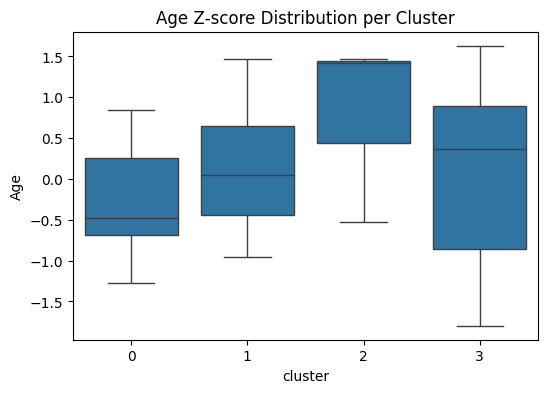

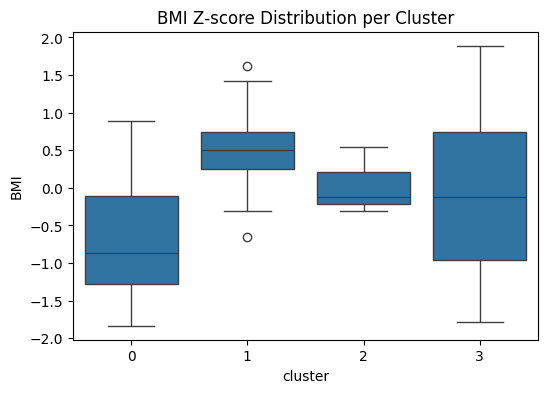

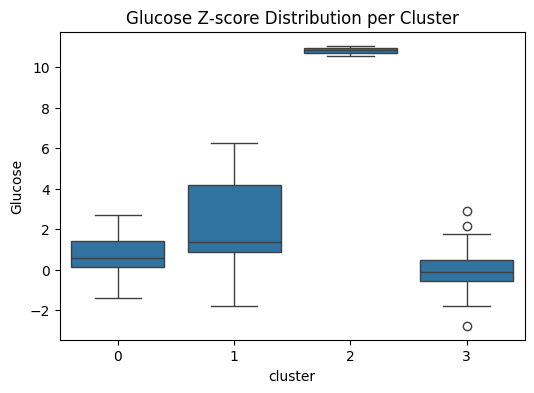

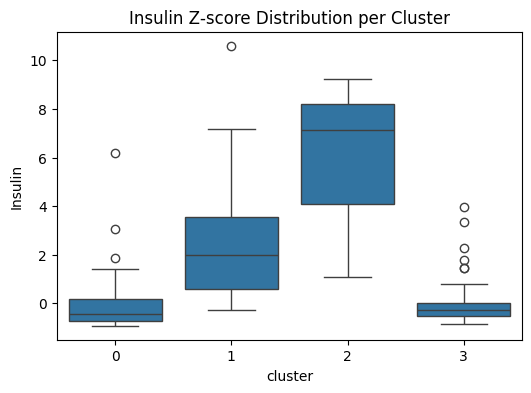

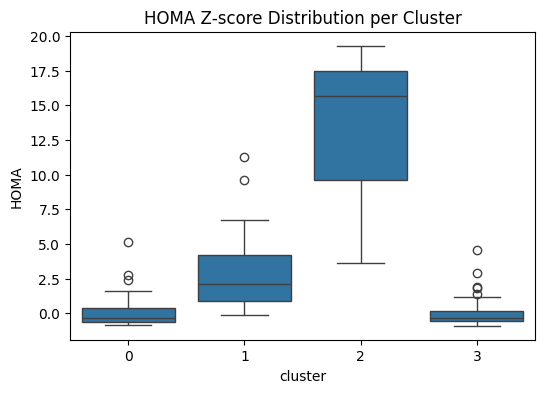

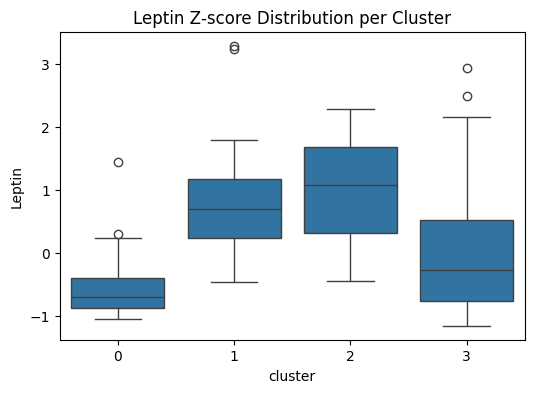

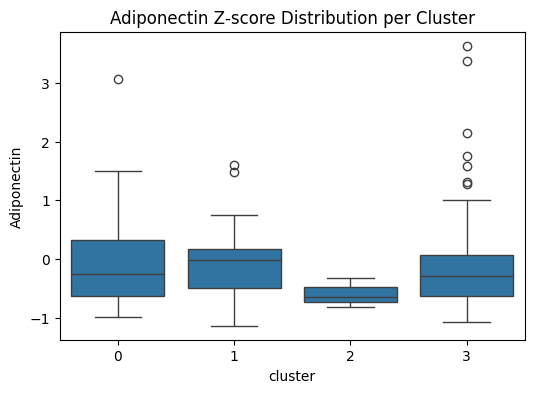

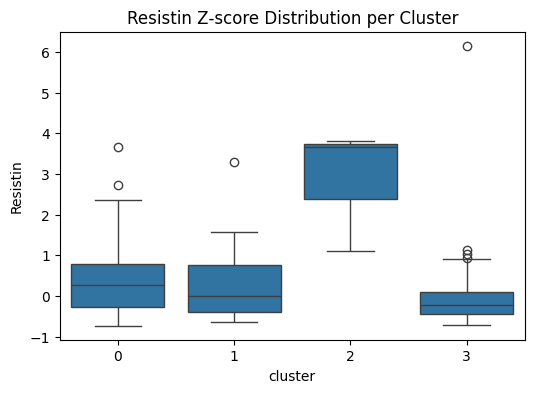

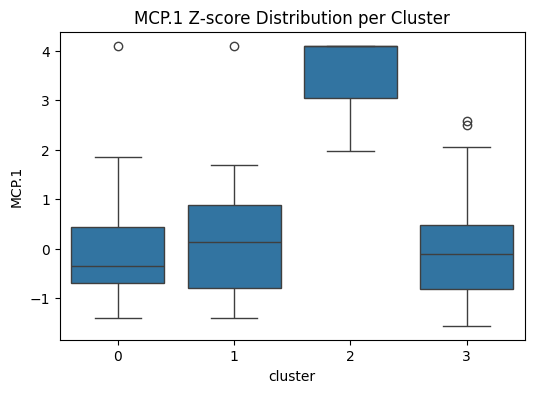

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns


# Put all your 9 biomarkers in a list
features = ["Age","BMI","Glucose","Insulin","HOMA","Leptin",
            "Adiponectin","Resistin","MCP.1"]


df_z_with_cluster = z_scores_all.copy()
df_z_with_cluster["cluster"] = df_complete["cluster_final"]


# One boxplot per feature
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_z_with_cluster, x="cluster", y=feature)
    plt.title(f"{feature} Z‑score Distribution per Cluster")
    plt.show()


**What is shown in these plots**

Each boxplot represents the **distribution of Z-scores** for a given variable  
(**Age, BMI, Insulin, Leptin, Adiponectin, Resistin, MCP-1**) across the different clusters.

Z-scores indicate how far a patient’s value deviates from the dataset average:
- **Z = 0** → average value  
- **Z > 0** → higher than average  
- **Z < 0** → lower than average  


**Variable-specific interpretation logic**

The following interpretations apply to all boxplots:

- **Age**  
  Positive Z-scores indicate **older** patients, while negative Z-scores indicate **younger** patients.

- **BMI**  
  Higher Z-scores correspond to **higher body mass index** relative to the average.

- **Insulin & HOMA**  
  Higher Z-scores indicate **higher insulin levels** and **greater insulin resistance**.

- **Leptin & Resistin**  
  Higher Z-scores suggest **altered adipokine levels**, often associated with metabolic imbalance.

- **Adiponectin**  
  Lower Z-scores indicate **reduced levels**, commonly linked to metabolic dysfunction.

- **MCP-1**  
  Higher Z-scores reflect **increased inflammatory activity**.


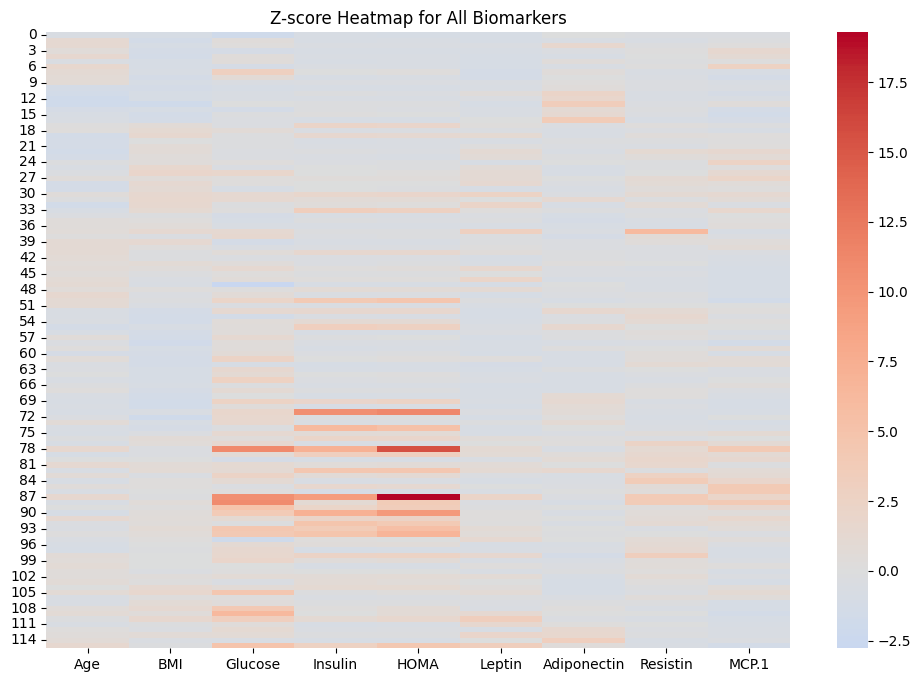

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
sns.heatmap(z_scores_all, cmap="coolwarm", center=0)
plt.title("Z-score Heatmap for All Biomarkers")
plt.show()


**Most patients are near normal(light colors)** : biomarker values close to healthy individuals.
* 0  → the patient is close to the healthy average


* Blue → the patient is below the healthy average


* Red → the patient is above the healthy average


* Darker colors → stronger deviation


* Rows = individual patients


* Columns = biomarkers
The biggest deviation is in glucose regulation:


* High insulin


* High glucose


* High HOMA




####Convert Z-score to interpretable severity label

In [119]:
def label_deviation(z_value):

    abs_z = abs(z_value)
    if abs_z < 1.0:
        return "Normal"
    elif abs_z < 1.5:
        return "Mild"
    elif abs_z < 2.5:
        return "Moderate"
    else:
        return "Severe"


deviation_labels = z_scores_all.applymap(label_deviation)
deviation_labels.columns = [f"{col}_deviation" for col in deviation_labels.columns]

/tmp/ipython-input-1552124486.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  deviation_labels = z_scores_all.applymap(label_deviation)


<Figure size 1400x600 with 0 Axes>

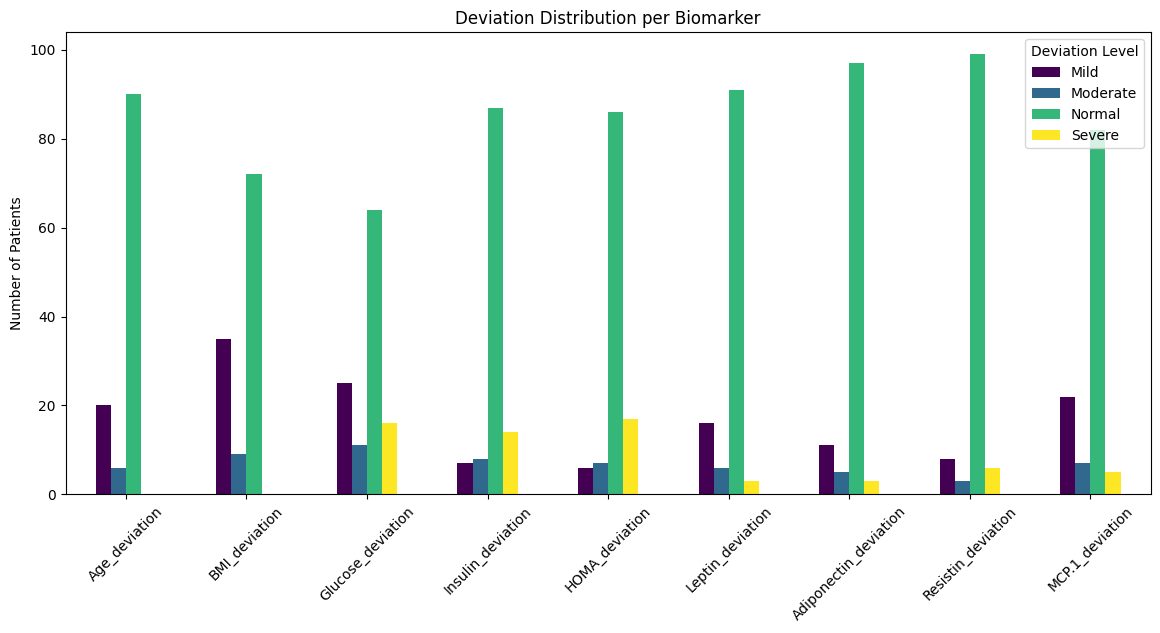

In [120]:
import pandas as pd

plt.figure(figsize=(14, 6))
deviation_counts = deviation_labels.apply(pd.Series.value_counts)

deviation_counts.T.plot(kind="bar", figsize=(14, 6), colormap="viridis")
plt.title("Deviation Distribution per Biomarker")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.legend(title="Deviation Level")
plt.show()


In [121]:
# Add Z-scores
for col in z_scores_all.columns:
 df_complete[f"{col}_zscore"] = z_scores_all[col]

# Add deviation labels
df_complete = pd.concat([df_complete, deviation_labels], axis=1)

# Add overall severity score
severity_map = {"Normal": 0, "Mild": 1, "Moderate": 2, "Severe": 3}
severity_scores = deviation_labels.applymap(lambda x: severity_map[x])
df_complete['overall_severity'] = severity_scores.mean(axis=1)

/tmp/ipython-input-1357280573.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  severity_scores = deviation_labels.applymap(lambda x: severity_map[x])


In [122]:
print("=== COMPLETE DATAFRAME SHAPE ===")
print(df_complete.shape)
print(df_complete.columns.tolist())

=== COMPLETE DATAFRAME SHAPE ===
(116, 29)
['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1', 'cluster_final', 'Age_zscore', 'BMI_zscore', 'Glucose_zscore', 'Insulin_zscore', 'HOMA_zscore', 'Leptin_zscore', 'Adiponectin_zscore', 'Resistin_zscore', 'MCP.1_zscore', 'Age_deviation', 'BMI_deviation', 'Glucose_deviation', 'Insulin_deviation', 'HOMA_deviation', 'Leptin_deviation', 'Adiponectin_deviation', 'Resistin_deviation', 'MCP.1_deviation', 'overall_severity']


In [123]:
cluster_profiles = df_complete.groupby("cluster_final")[features].mean()
cluster_z_profiles = z_scores_all.loc[df_complete.index].groupby(
 df_complete["cluster_final"]).mean()


In [124]:
print("\n=== CLUSTER MEAN Z-SCORES ===")
print(cluster_z_profiles)



=== CLUSTER MEAN Z-SCORES ===
                        Age           BMI       Glucose       Insulin  \
cluster_final                                                           
0             -2.637409e-01 -6.977536e-01  7.145200e-01  2.614863e-02   
1              1.445964e-01  5.171903e-01  2.202913e+00  2.500510e+00   
2              7.871652e-01  4.013144e-02  1.083605e+01  5.815453e+00   
3             -1.836138e-16 -5.839346e-16  4.654397e-16 -8.433425e-17   

                       HOMA        Leptin   Adiponectin      Resistin  \
cluster_final                                                           
0              1.000258e-01 -5.474283e-01  1.147906e-02  4.089881e-01   
1              3.014525e+00  8.308007e-01 -4.101014e-02  3.174112e-01   
2              1.285822e+01  9.783275e-01 -5.949936e-01  2.864544e+00   
3              1.526557e-16  1.643984e-16  2.148388e-16  6.908870e-17   

                      MCP.1  
cluster_final                
0             -2.631616e-02  
1

In [126]:
# Identify top 3 abnormal features per cluster
for cluster_id in range(3):
    top_features = cluster_z_profiles.loc[cluster_id].abs().nlargest(3)
    print(f"\nCluster {cluster_id} - Most Abnormal Features:")
    for feat, z in top_features.items():
        print(f" {feat}: {z:.2f} SD from healthy")


Cluster 0 - Most Abnormal Features:
 Glucose: 0.71 SD from healthy
 BMI: 0.70 SD from healthy
 Leptin: 0.55 SD from healthy

Cluster 1 - Most Abnormal Features:
 HOMA: 3.01 SD from healthy
 Insulin: 2.50 SD from healthy
 Glucose: 2.20 SD from healthy

Cluster 2 - Most Abnormal Features:
 HOMA: 12.86 SD from healthy
 Glucose: 10.84 SD from healthy
 Insulin: 5.82 SD from healthy


#V. Evaluation

##V.1. DSO1 : Predict the diagnosis type — M (Malignant) or B (Benign)


####Evaluation on the test set Random forest

- I predict the labels on `X_test` and print:
  - the **classification report** (precision, recall, f1-score for Benign and Malignant),
  - the **confusion matrix** (number of correct and incorrect predictions).
- I also compute the **test accuracy**, which is 0.9766 in my run.
- To check that the result is not due to a lucky split, I run a **5-fold cross-validation** on all the data (`X_scaled`, `y_model`).  
  The mean cross-validation accuracy is very close to the test accuracy, which suggests that the model generalises well and is not strongly overfitting.


In [93]:
y_pred = rf.predict(X_test)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

=== Confusion Matrix ===
[[107   0]
 [  4  60]]


In [94]:
# 3. Evaluation on the test set
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9766


In [95]:
cv_mean = cross_val_score(rf, X_scaled, y_model, cv=5).mean()
print(f"Mean Cross-Validation Accuracy (5-fold): {cv_mean:.4f}")

Mean Cross-Validation Accuracy (5-fold): 0.9614


#### ROC curve and AUC random forest


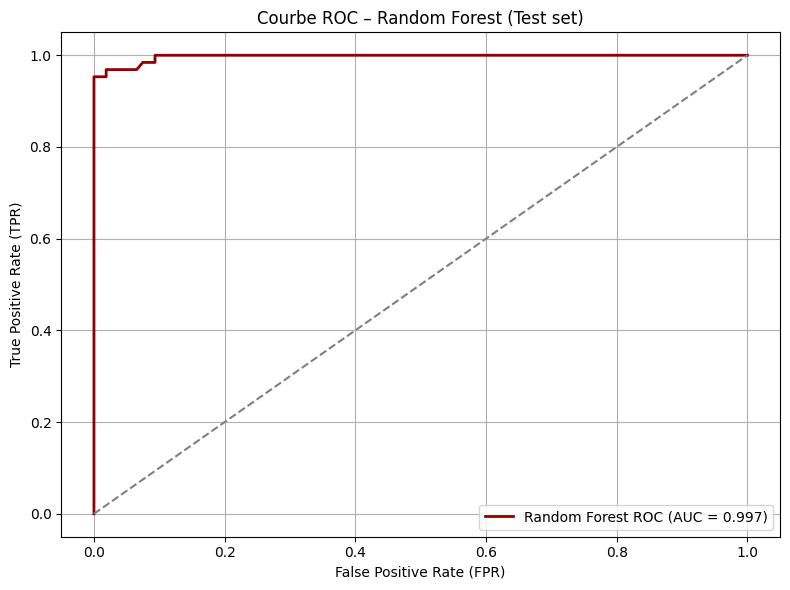

In [96]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilités pour la classe 1 (Malignant)
y_test_proba = rf.predict_proba(X_test)[:, 1]

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
auc_rf = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest ROC (AUC = {auc_rf:.3f})", color="darkred", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Courbe ROC – Random Forest (Test set)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

The ROC curve of the Random Forest on the test set is very close to the top-left
corner. The Area Under the Curve is **AUC = 0.997**, which indicates an excellent
ability to separate benign (0) from malignant (1) tumours.  
The model keeps a very high true positive rate (sensitivity) while maintaining a
very low false positive rate, which is desirable in a medical screening context.

####Hyperparameter search with GridSearchCV mlp

- Search space:
  - `hidden_layer_sizes`:
    - `(32,)`, `(64,)`  → one hidden layer
    - `(32, 16)`, `(64, 32)` → two hidden layers
  - `alpha` ∈ {1e-4, 1e-3, 1e-2} (L2 regularisation)
  - `learning_rate_init` ∈ {1e-3, 5e-4}
- Use `GridSearchCV` with:
  - estimator: `mlp_base`
  - scoring: `"accuracy"`
  - `cv = 5`
- Fit the grid on all data (`X_scaled`, `y_model_2`) and display:
  - best hyperparameters
  - best mean CV accuracy.

In [97]:
param_grid = {
    "hidden_layer_sizes": [
        (32,),         # une couche
        (64,),
        (32, 16),      # deux couches
        (64, 32)
    ],
    "alpha": [1e-4, 1e-3, 1e-2],          # régularisation L2
    "learning_rate_init": [1e-3, 5e-4]    # taux d’apprentissage
}

grid = GridSearchCV(
    estimator=mlp_base,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)

In [98]:
grid.fit(X_scaled, y_model_2)

GridSearchCV(cv=5,
             estimator=MLPClassifier(batch_size=32, early_stopping=True,
                                     max_iter=500, n_iter_no_change=20,
                                     random_state=42, validation_fraction=0.2),
             n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(32,), (64,), (32, 16),
                                                (64, 32)],
                         'learning_rate_init': [0.001, 0.0005]},
             scoring='accuracy')

In [99]:
print("=== Meilleurs hyperparamètres trouvés ===")
print(grid.best_params_)
print(f"Meilleure accuracy moyenne CV (5-fold): {grid.best_score_:.4f}")

=== Meilleurs hyperparamètres trouvés ===
{'alpha': 0.0001, 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.001}
Meilleure accuracy moyenne CV (5-fold): 0.9772


#### Evaluation on the test set mlp

- Take the best estimator returned by `GridSearchCV` and refit it on the **training set**.
- On the test set:
  - print the **classification report** (precision, recall, f1-score),
  - print the **confusion matrix**,
  - compute the **test accuracy**.
- Also compute the **training accuracy** to check overfitting.
- In my run:
  - Test accuracy ≈ 0.977
  - Train accuracy ≈ 0.993  
  The values are close, which indicates good generalisation and limited overfitting.

In [100]:
best_mlp = grid.best_estimator_
best_mlp.fit(X_train, y_train)

MLPClassifier(batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 32),
              max_iter=500, n_iter_no_change=20, random_state=42,
              validation_fraction=0.2)

In [101]:
y_pred = best_mlp.predict(X_test)
print("\n=== Best MLP - Classification Report (Test) ===")
print(classification_report(y_test, y_pred))

print("=== Best MLP - Confusion Matrix (Test) ===")
print(confusion_matrix(y_test, y_pred))

test_acc = accuracy_score(y_test, y_pred)
print(f"Best MLP Test Accuracy: {test_acc:.4f}")

# Train accuracy pour vérifier l’overfitting
y_train_pred = best_mlp.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Best MLP Train Accuracy: {train_acc:.4f}")


=== Best MLP - Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

=== Best MLP - Confusion Matrix (Test) ===
[[107   0]
 [  4  60]]
Best MLP Test Accuracy: 0.9766
Best MLP Train Accuracy: 0.9925


#### ROC curve and AUC MLP

- Use `predict_proba` to get the probability of the malignant class on the test set.
- Compute and plot the **ROC curve** and the **AUC** for the tuned MLP.

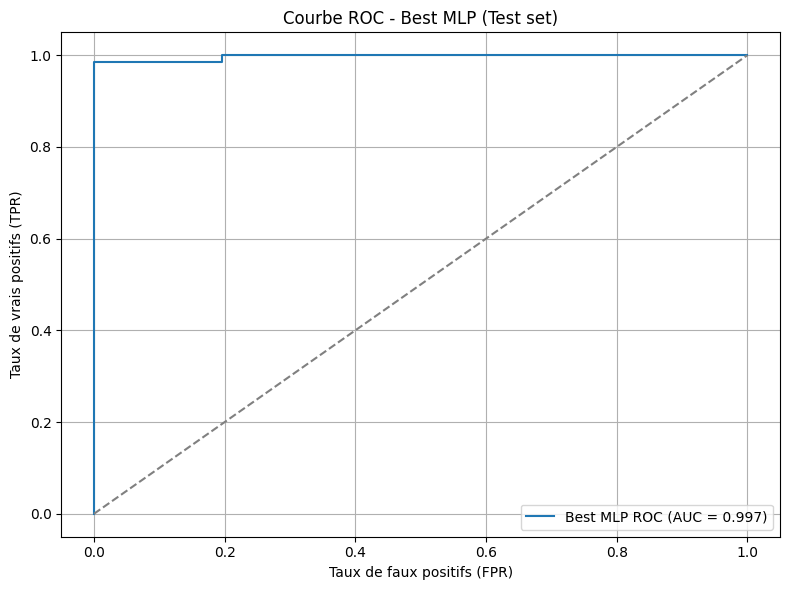

In [102]:
y_test_proba = best_mlp.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
auc_mlp = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Best MLP ROC (AUC = {auc_mlp:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - Best MLP (Test set)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

The ROC curve of the tuned MLP on the test set is very close to the top-left
corner, with an AUC of about **0.997**. This shows an excellent ability to
separate benign from malignant tumours. Together with a test accuracy around
97.7% and a train accuracy slightly higher, the model appears powerful and only
mildly overfitted.

#### Evaluation on the test and train sets gru-svm

- The GRU-SVM outputs a real score in ℝ.  
  We convert it to labels in {−1, +1} using a **sign threshold at 0**:
  - score ≥ 0 → +1 (Malignant)
  - score  < 0 → −1 (Benign)
- For compatibility with scikit-learn metrics, we also build 0/1 versions:
  - `1` = Malignant, `0` = Benign.
- On the **test set**, we print:
  - classification report,
  - confusion matrix,
  - test accuracy.
- On the **train set**, we compute:
  - training accuracy,
  - to check for overfitting (train vs test).

In [103]:
y_test_scores = gru_svm.predict(X_test_gru).flatten()
y_test_pred_svm = np.where(y_test_scores >= 0, 1.0, -1.0)

# pour les métriques scikit-learn classiques, on repasse en 0/1
y_test_bin = (y_test_gru == 1).astype(int)
y_pred_bin = (y_test_pred_svm == 1).astype(int)

print("\n=== GRU-SVM - Classification Report (Test) ===")
print(classification_report(y_test_bin, y_pred_bin, target_names=['Benign', 'Malignant']))

print("=== GRU-SVM - Confusion Matrix (Test) ===")
print(confusion_matrix(y_test_bin, y_pred_bin))

test_acc = accuracy_score(y_test_bin, y_pred_bin)
print(f"GRU-SVM Test Accuracy: {test_acc:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

=== GRU-SVM - Classification Report (Test) ===
              precision    recall  f1-score   support

      Benign       0.95      1.00      0.97       107
   Malignant       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171

=== GRU-SVM - Confusion Matrix (Test) ===
[[107   0]
 [  6  58]]
GRU-SVM Test Accuracy: 0.9649


In [104]:
# --- Accuracy sur le TRAIN pour détecter l’overfitting ---
y_train_scores = gru_svm.predict(X_train_gru).flatten()
y_train_pred_svm = np.where(y_train_scores >= 0, 1.0, -1.0)

y_train_bin = (y_train_gru == 1).astype(int)
y_train_pred_bin = (y_train_pred_svm == 1).astype(int)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train_bin, y_train_pred_bin)
print(f"GRU-SVM Train Accuracy: {train_acc:.4f}")
print(f"GRU-SVM Test  Accuracy: {test_acc:.4f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
GRU-SVM Train Accuracy: 0.9724
GRU-SVM Test  Accuracy: 0.9649


#### ROC curve and AUC svm-gru

- The SVM score is a signed distance to the decision boundary.  
  We convert this score to a pseudo-probability using a logistic function:
  \[ p = 1 / (1 + e^{-score}) \]
- With these probabilities, we compute:
  - the **ROC curve**,
  - the **AUC** for the GRU-SVM on the test set.

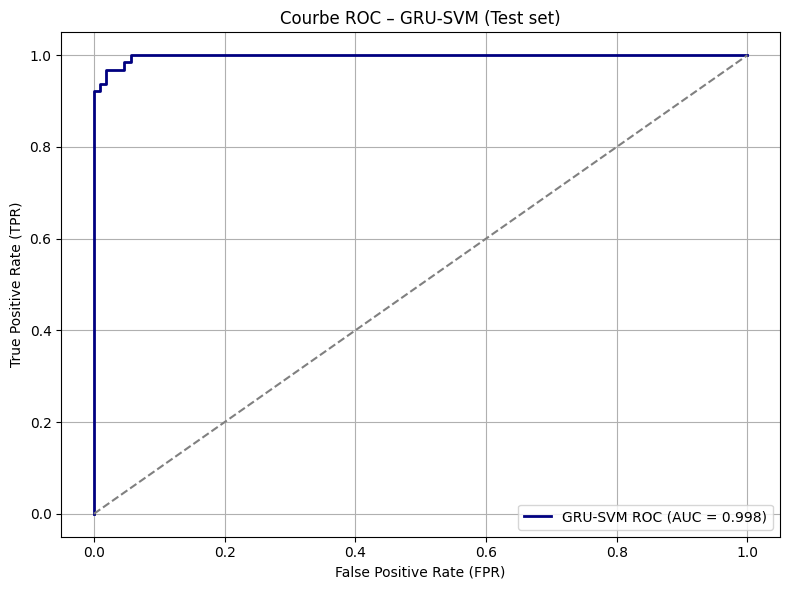

In [105]:
y_test_proba = 1 / (1 + np.exp(-y_test_scores))

fpr, tpr, _ = roc_curve(y_test_bin, y_test_proba)
auc_gru = roc_auc_score(y_test_bin, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"GRU-SVM ROC (AUC = {auc_gru:.3f})", color="navy", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Courbe ROC – GRU-SVM (Test set)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

The ROC curve for GRU-SVM is close to the top-left corner with a high AUC
(≈ 0.99 in my run). Combined with similar train and test accuracies, this
indicates that the GRU-SVM model also achieves very good separation between
benign and malignant tumours, without strong overfitting.

##V.1. DSO2: Cluster diagnosis patterns


In [106]:
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score, calinski_harabasz_score,
    adjusted_rand_score, normalized_mutual_info_score,
    homogeneity_score, completeness_score, v_measure_score
)

def evaluate_clustering(X2, labels):
    results = {}

    # Internal metrics
    results["silhouette"] = silhouette_score(X2, labels)
    results["davies_bouldin"] = davies_bouldin_score(X2, labels)
    results["calinski_harabasz"] = calinski_harabasz_score(X2, labels)


    return results


In [107]:
results_kmeans_3 = evaluate_clustering(
    X_cancer_scaled,
    df_cancer["cluster_kmeans_cancer_3"]
)
print("Évaluation KMeans k=3 :")
print(results_kmeans_3)


Évaluation KMeans k=3 :
{'silhouette': np.float64(0.21868320395349716), 'davies_bouldin': np.float64(1.536041600853445), 'calinski_harabasz': np.float64(17.5139969952865)}


In [108]:
results_agg = evaluate_clustering(
    X_cancer_scaled,
    df_cancer["cluster_agg_3"]
)
print("Évaluation Agglomératif :")
print(results_agg)


Évaluation Agglomératif :
{'silhouette': np.float64(0.16333552353660807), 'davies_bouldin': np.float64(1.4241494410103923), 'calinski_harabasz': np.float64(15.335836102104611)}


In [109]:
results_gmm = evaluate_clustering(
    X_cancer_scaled,
    df_cancer["cluster_gmm"]
)
print("Évaluation GMM :")
print(results_gmm)


Évaluation GMM :
{'silhouette': np.float64(0.16794200374270676), 'davies_bouldin': np.float64(1.6872830445113796), 'calinski_harabasz': np.float64(12.035539400172546)}


#VI. Deployment